In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
import ROOT
import rootpy
from rootpy.io import root_open
import rootpy.plotting.root2matplotlib as rplt
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

In [4]:
original = root_open('output/scenarios/Original_DB/hists/0/Brunel-histos.root')
plus = root_open('output/scenarios/tip_x=0um_y=+10000um/hists/0/Brunel-histos.root')
minus = root_open('output/scenarios/tip_x=0um_y=-10000um/hists/0/Brunel-histos.root')

In [5]:
set([x.GetName().split('_')[0] for x in original.Track.PrChecker.Forward.keys()])

{'Eta', 'P', 'Phi', 'Pt', 'long', 'long>5GeV', 'nPV'}

In [6]:
set([x.GetName().split('_')[-1] for x in original.Track.PrChecker.Forward.keys()])

{'Events',
 'Ghosts',
 'HitEff',
 'Total',
 'reconstructed',
 'reconstructedHits',
 'reconstructible'}

In [7]:
keys = [x.GetName() for x in original.Track.PrChecker.Forward.keys()]

In [8]:
def plot(var, xlim=None):
    ho = getattr(original.Track.PrChecker.Forward, var)
    hp = getattr(plus.Track.PrChecker.Forward, var)
    hm = getattr(minus.Track.PrChecker.Forward, var)
    hp.set_line_color('r')
    hm.set_line_color('b')
    rplt.hist(ho)
    rplt.hist(hp)
    rplt.hist(hm)
    plt.title(var)
    if xlim:
        plt.xlim(xlim)

In [9]:
keys

['nPV_Events',
 'nPV_Ghosts',
 'Eta_Ghosts',
 'Phi_Ghosts',
 'Pt_Ghosts',
 'P_Ghosts',
 'nPV_Total',
 'Eta_Total',
 'Phi_Total',
 'Pt_Total',
 'P_Total',
 'long_nPV_reconstructible',
 'long_Eta_reconstructible',
 'long_Phi_reconstructible',
 'long_Pt_reconstructible',
 'long_P_reconstructible',
 'long_expectedHits_reconstructible',
 'long_docaz_reconstructible',
 'long_PVz_reconstructible',
 'long_EtaPhi_reconstructible',
 'long_Eta_neg_reconstructible',
 'long_Phi_neg_reconstructible',
 'long_EtaPhi_neg_reconstructible',
 'long_nPV_reconstructed',
 'long_Eta_reconstructed',
 'long_Phi_reconstructed',
 'long_Pt_reconstructed',
 'long_P_reconstructed',
 'long_expectedHits_reconstructed',
 'long_reconstructedHits',
 'long_HitEff',
 'long_docaz_reconstructed',
 'long_PVz_reconstructed',
 'long_EtaPhi_reconstructed',
 'long_Eta_neg_reconstructed',
 'long_Phi_neg_reconstructed',
 'long_EtaPhi_neg_reconstructed',
 'long>5GeV_nPV_reconstructible',
 'long>5GeV_Eta_reconstructible',
 'long>5GeV

Skipped: long_EtaPhi_reconstructible
Skipped: long_EtaPhi_neg_reconstructible


/pc2014-data3/cburr/.software/miniconda3/envs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Skipped: long_EtaPhi_reconstructed
Skipped: long_EtaPhi_neg_reconstructed
Skipped: long>5GeV_EtaPhi_reconstructible
Skipped: long>5GeV_EtaPhi_neg_reconstructible
Skipped: long>5GeV_EtaPhi_reconstructed
Skipped: long>5GeV_EtaPhi_neg_reconstructed
Skipped: long_EtaPhi_pos_reconstructible
Skipped: long_EtaPhi_pos_reconstructed
Skipped: long>5GeV_EtaPhi_pos_reconstructible
Skipped: long>5GeV_EtaPhi_pos_reconstructed
Skipped: long_strange_EtaPhi_reconstructible
Skipped: long_strange_EtaPhi_pos_reconstructible
Skipped: long_strange_EtaPhi_reconstructed
Skipped: long_strange_EtaPhi_pos_reconstructed
Skipped: long_strange>5GeV_EtaPhi_reconstructible
Skipped: long_strange>5GeV_EtaPhi_pos_reconstructible
Skipped: long_strange>5GeV_EtaPhi_reconstructed
Skipped: long_strange>5GeV_EtaPhi_pos_reconstructed
Skipped: long_strange_EtaPhi_neg_reconstructible
Skipped: long_strange_EtaPhi_neg_reconstructed
Skipped: long_strange>5GeV_EtaPhi_neg_reconstructible
Skipped: long_strange>5GeV_EtaPhi_neg_reconstr

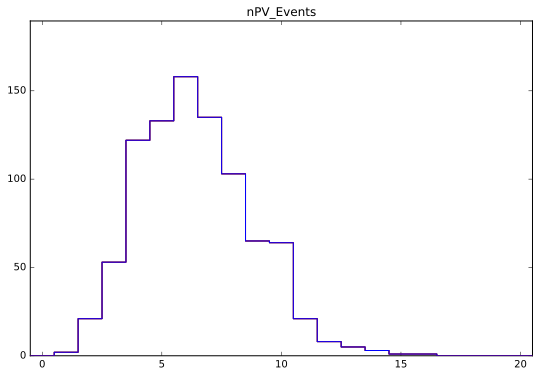

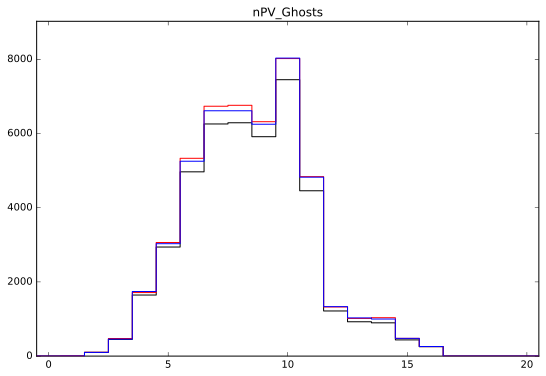

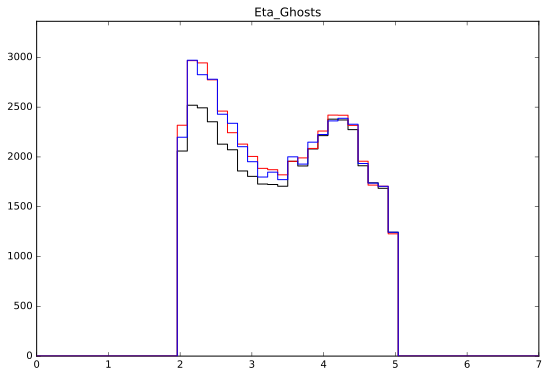

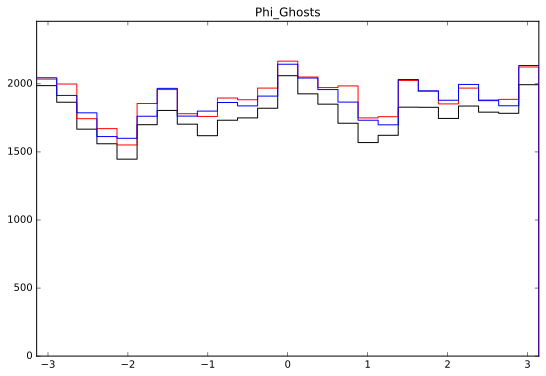

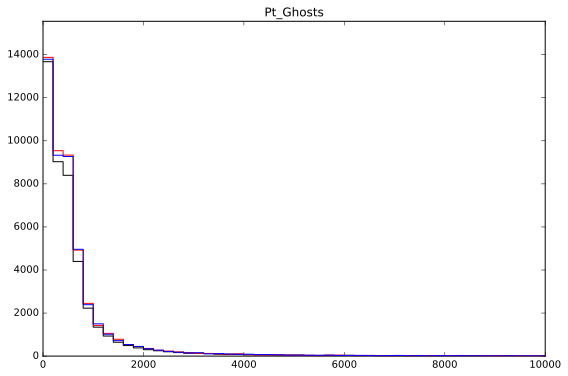

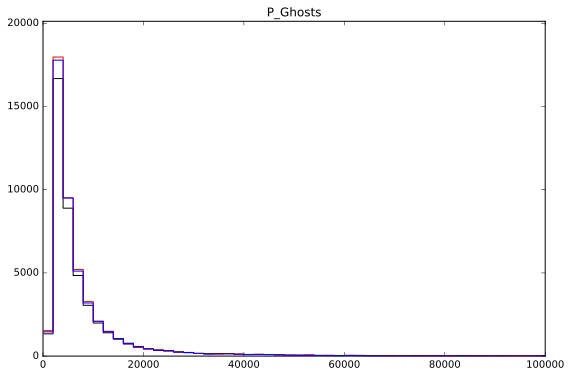

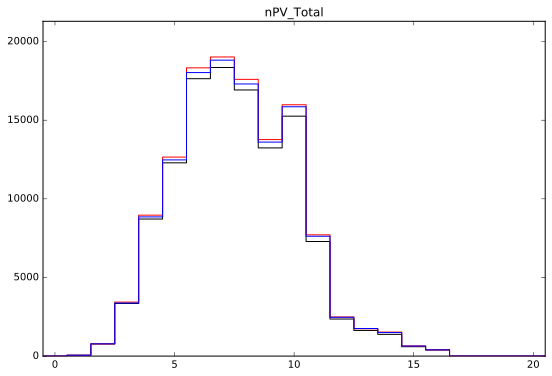

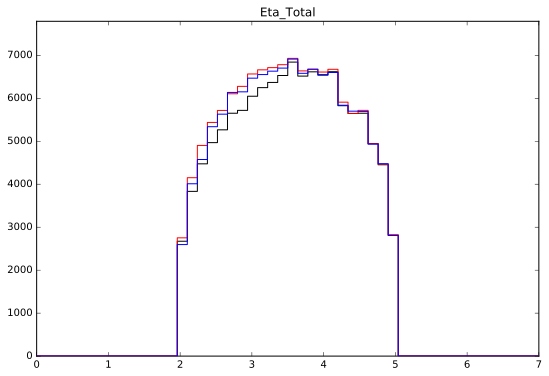

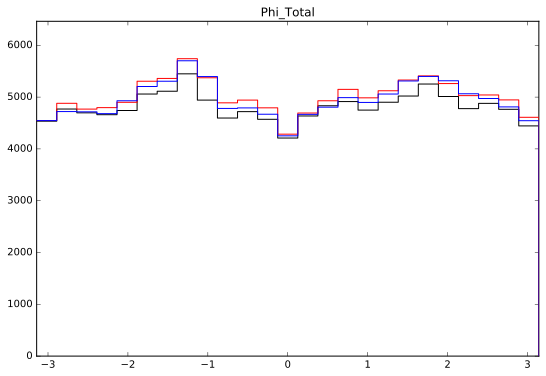

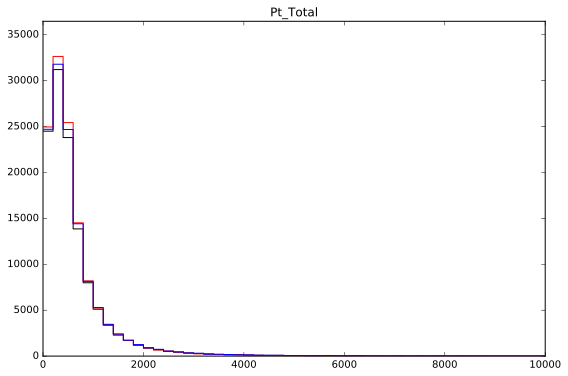

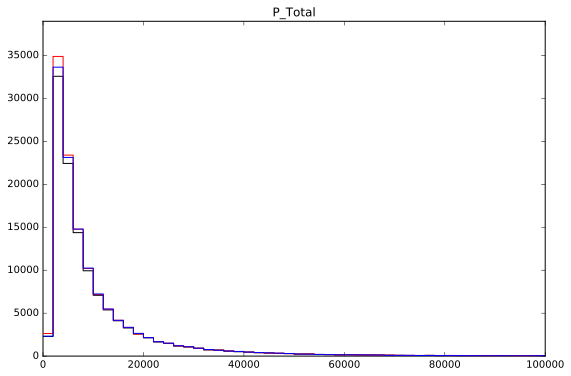

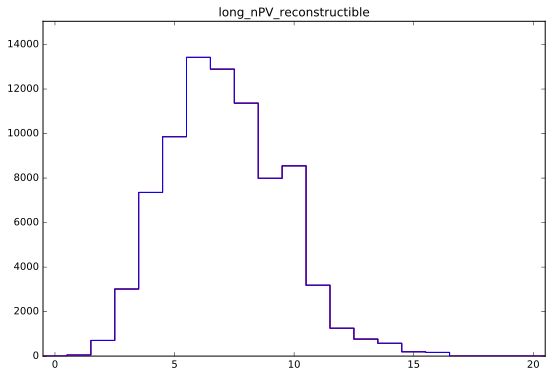

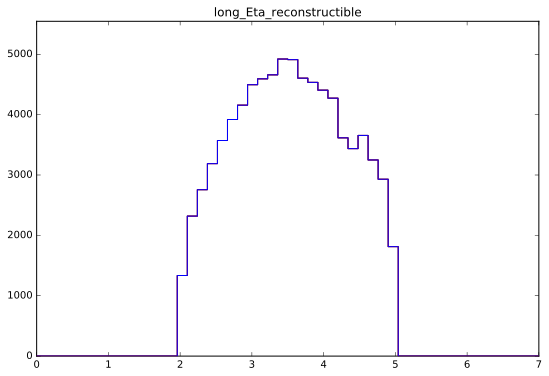

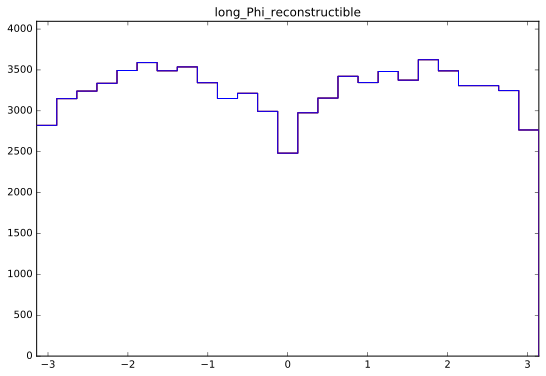

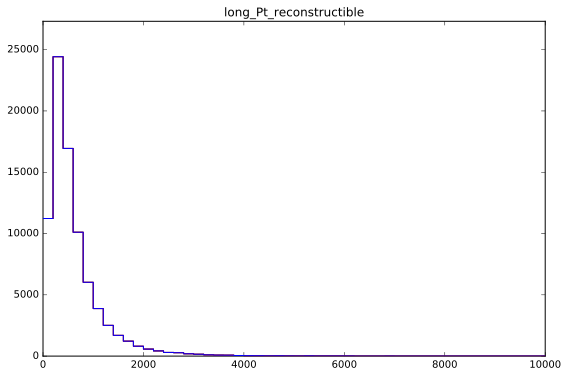

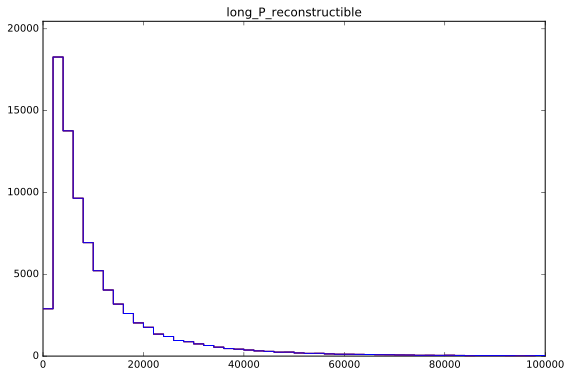

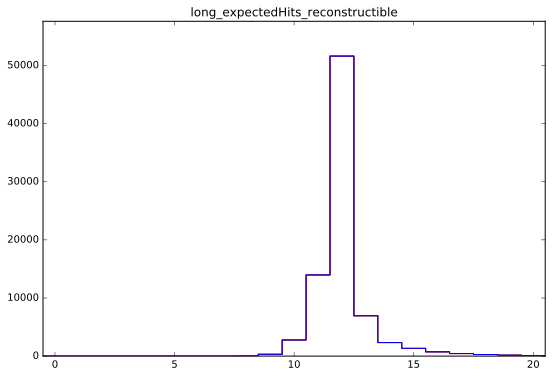

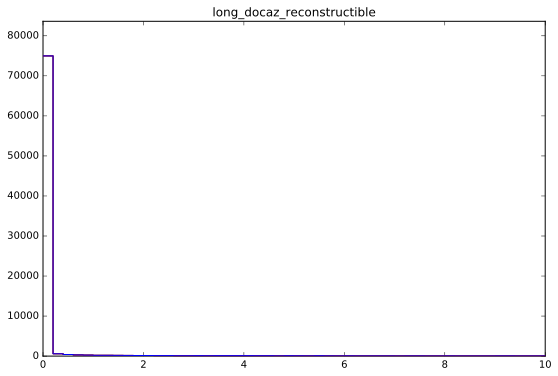

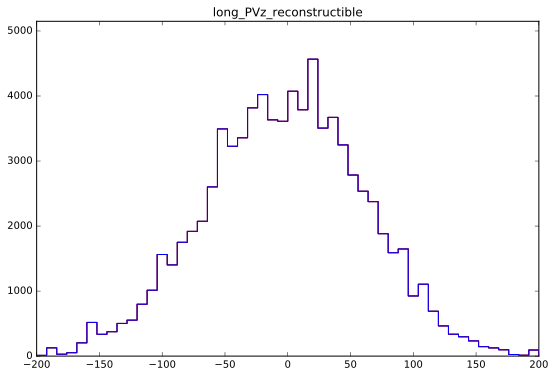

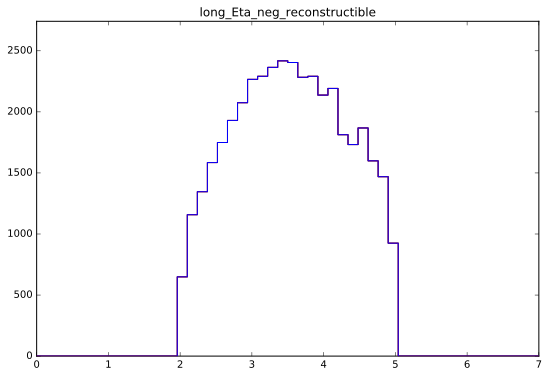

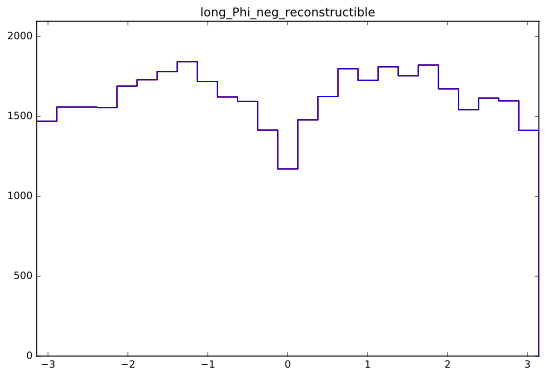

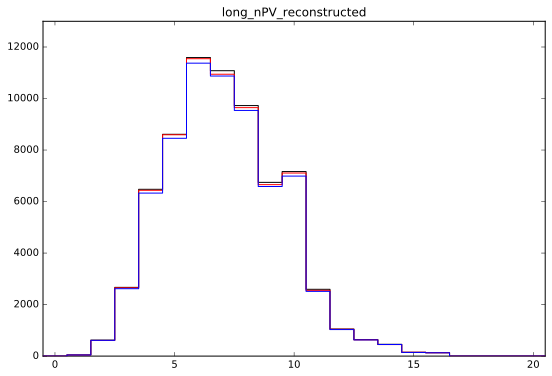

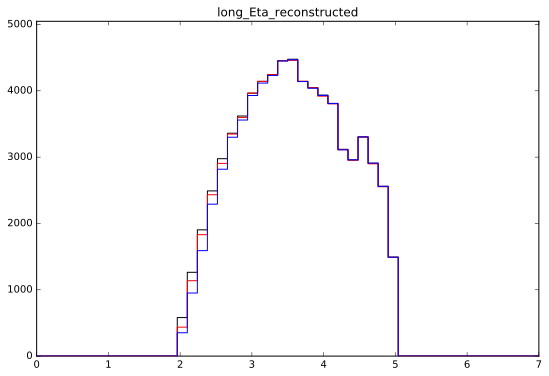

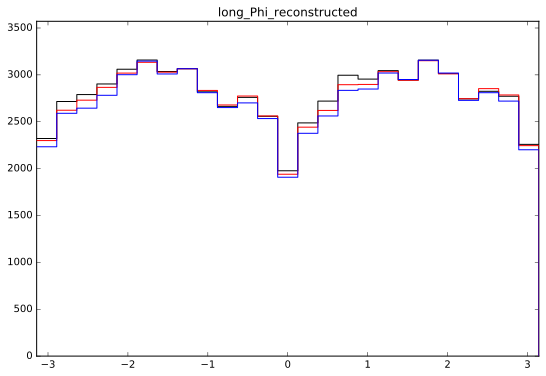

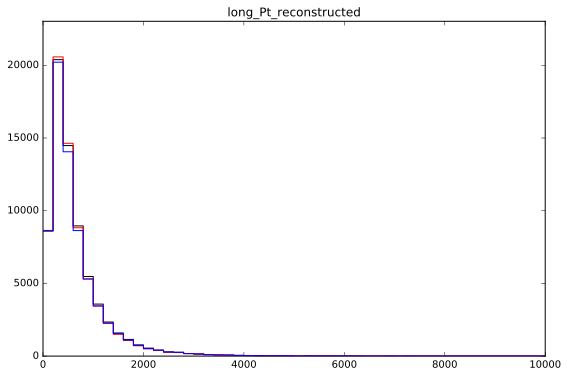

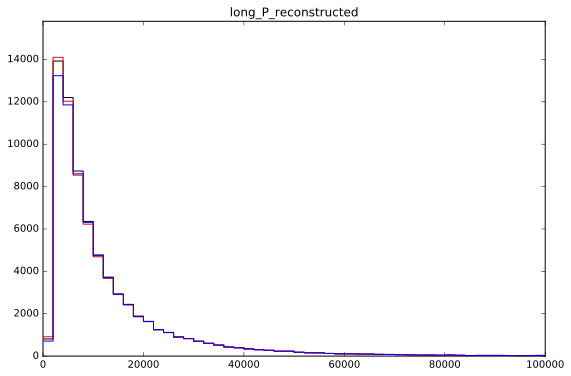

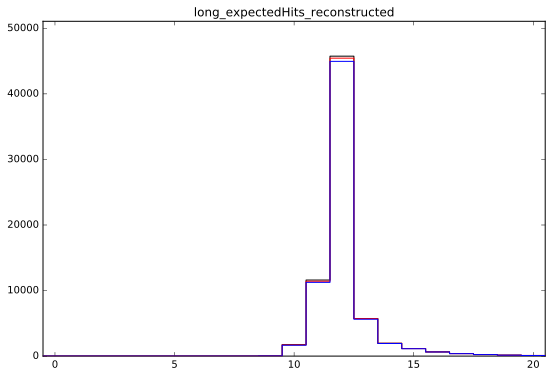

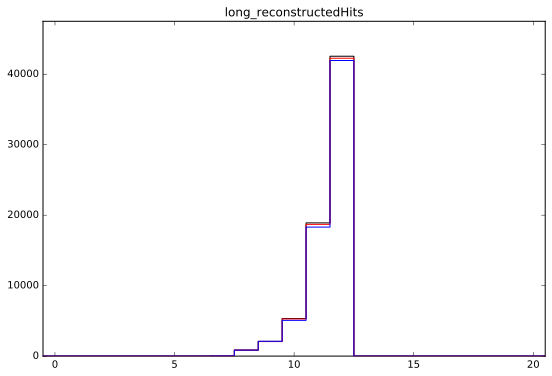

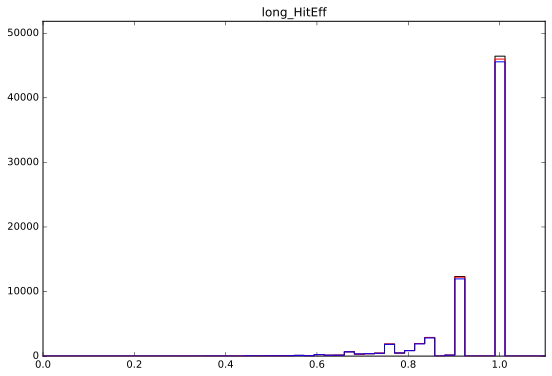

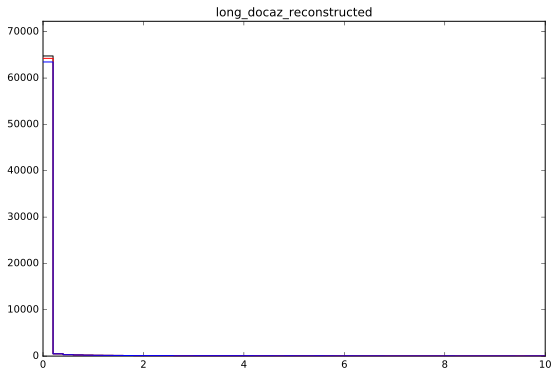

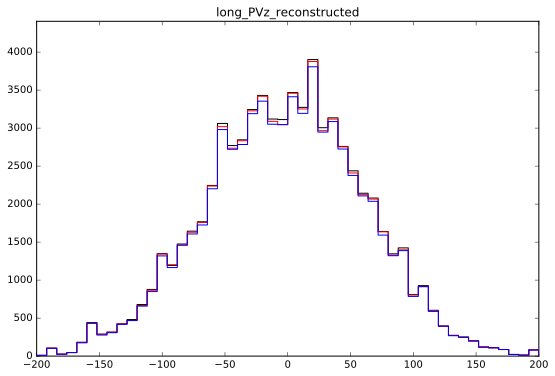

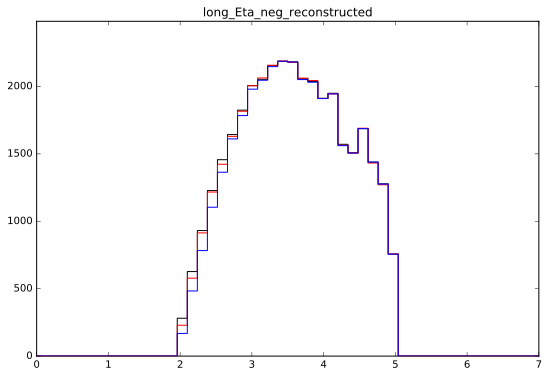

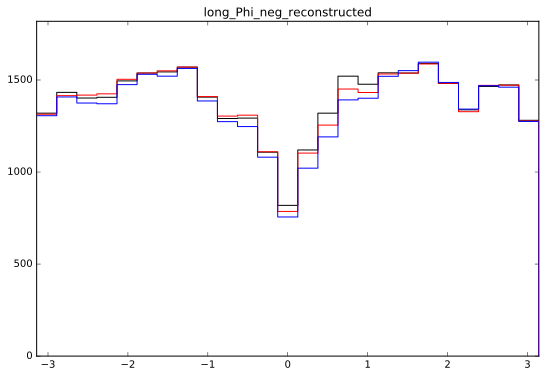

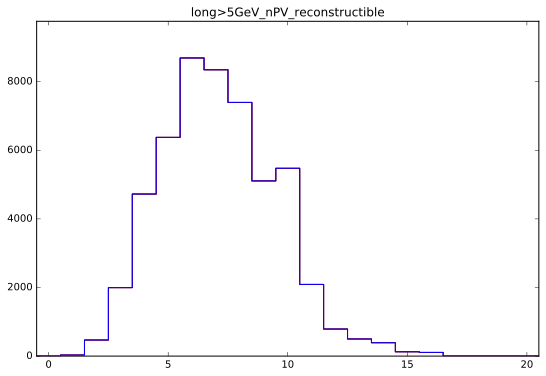

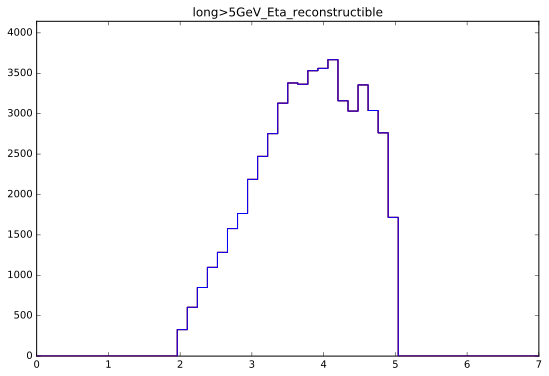

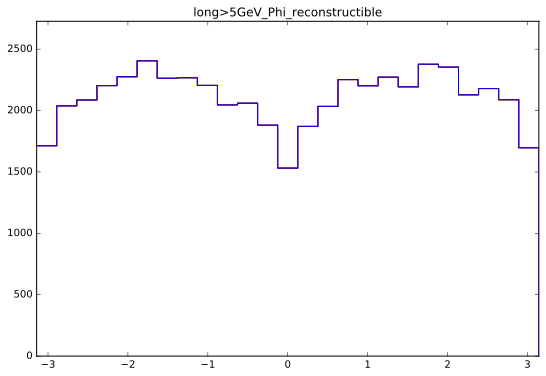

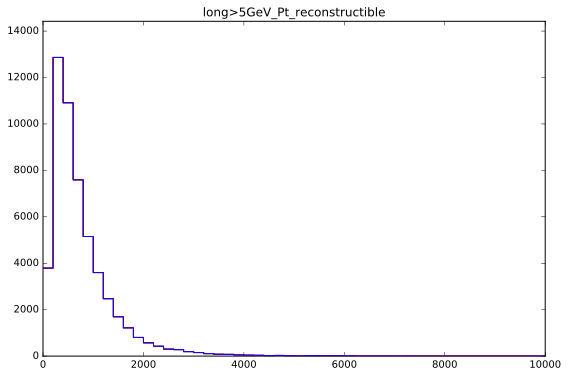

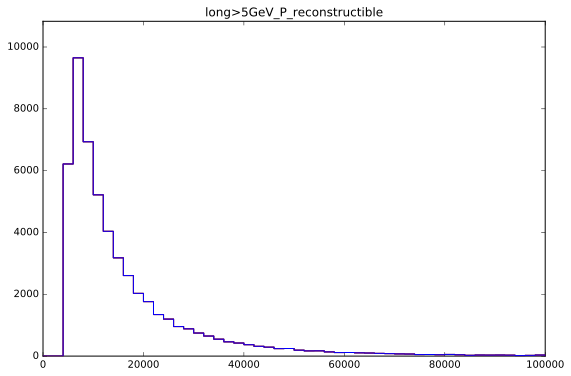

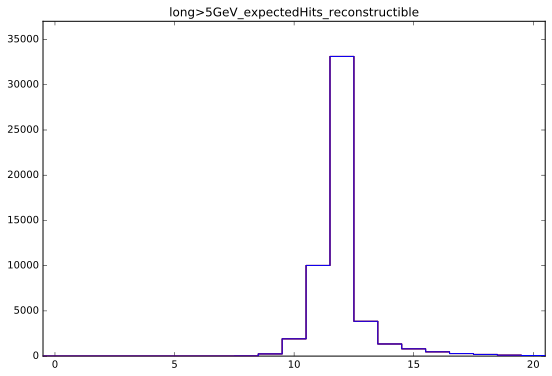

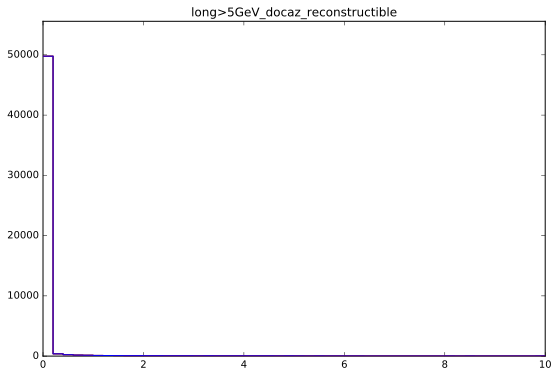

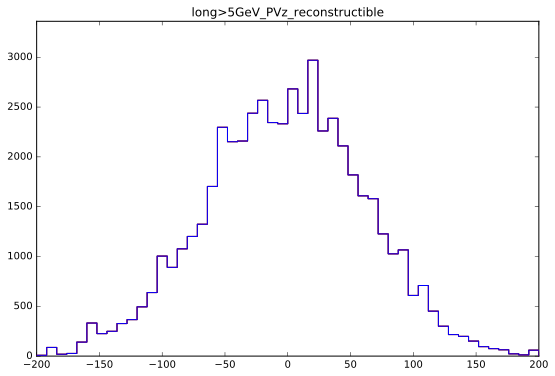

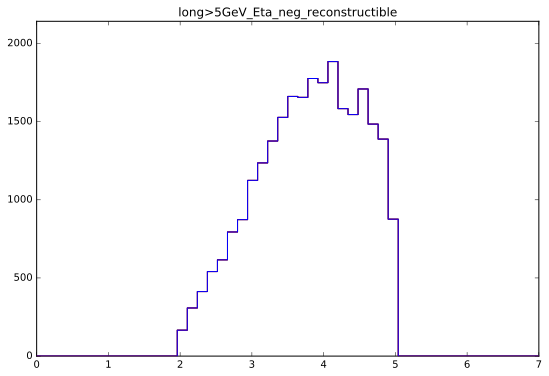

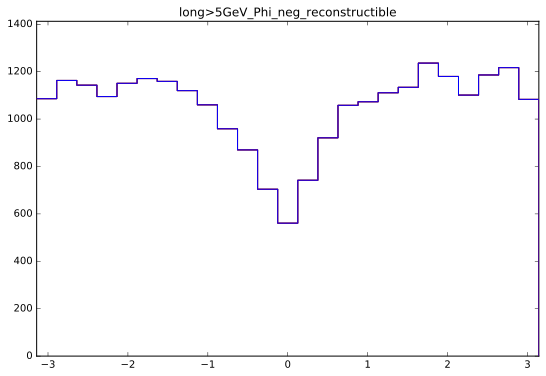

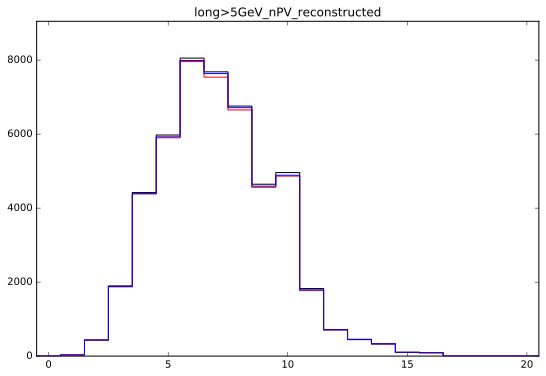

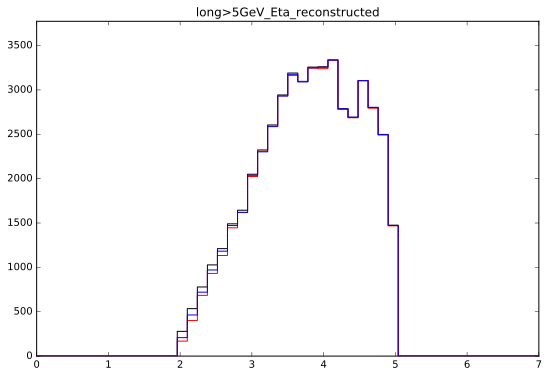

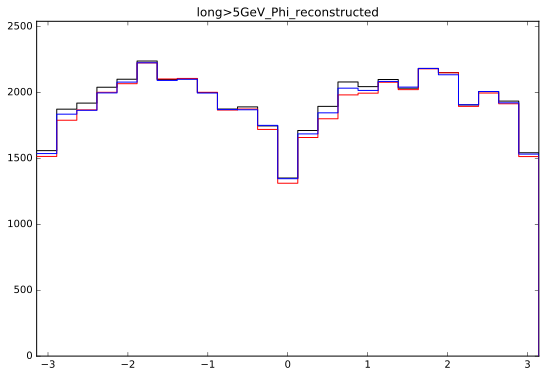

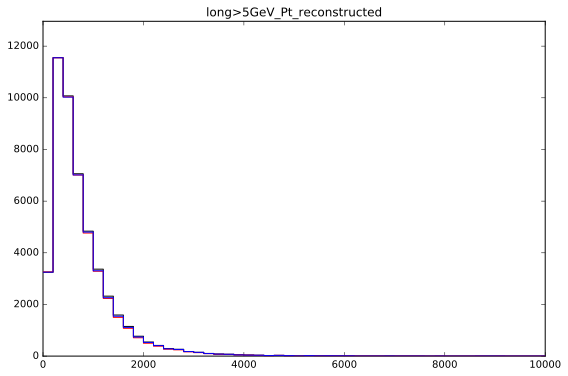

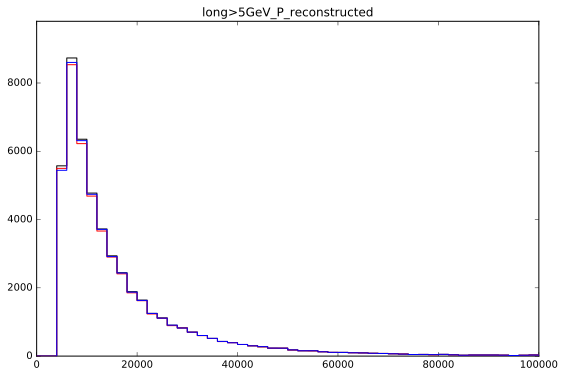

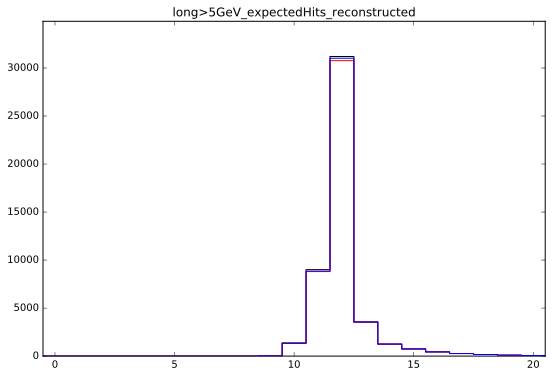

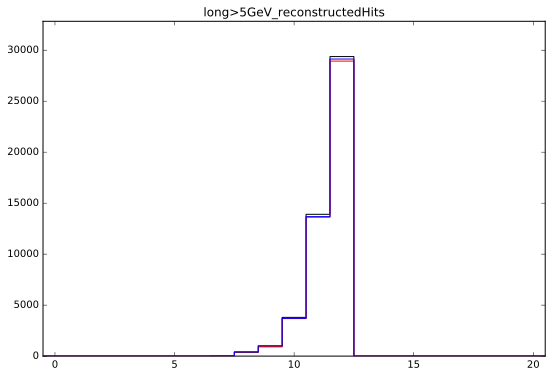

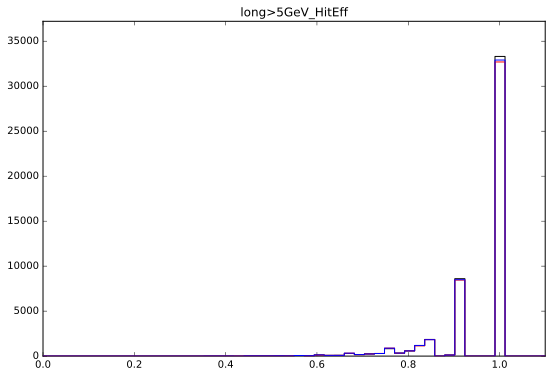

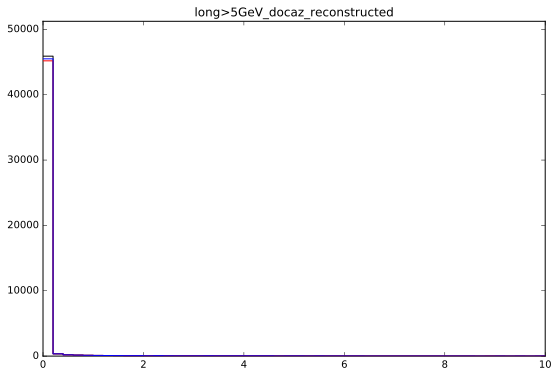

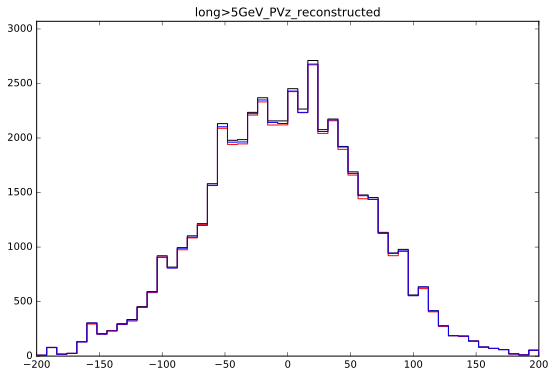

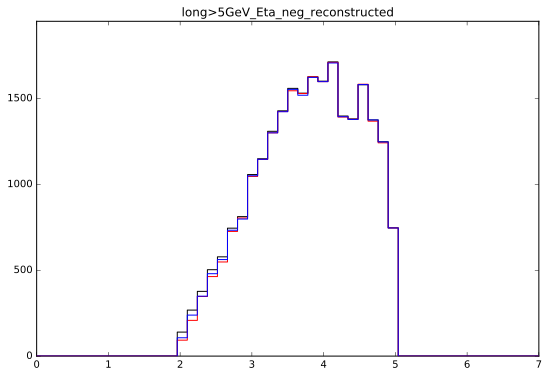

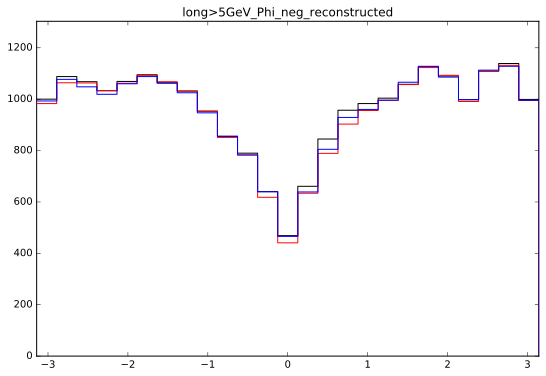

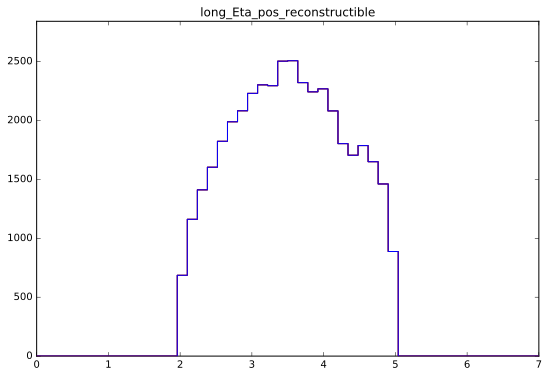

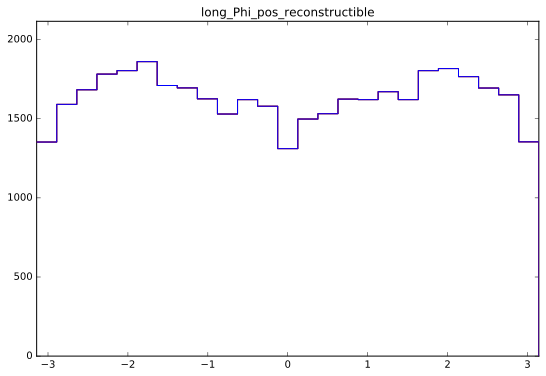

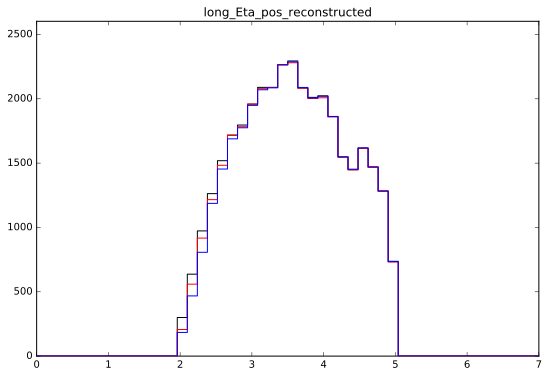

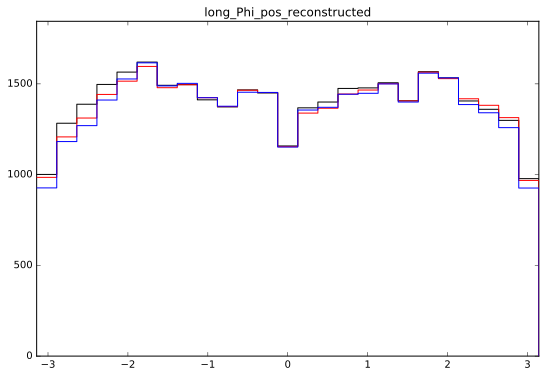

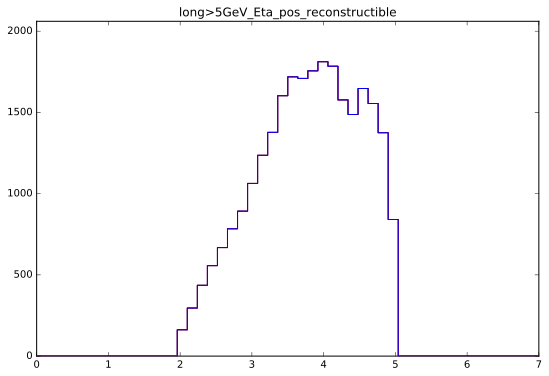

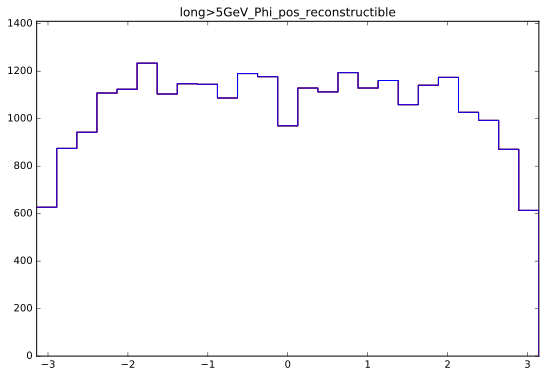

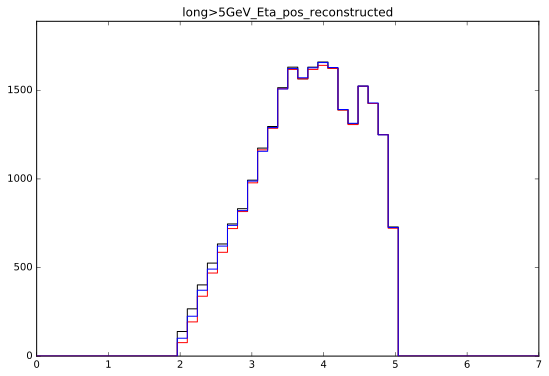

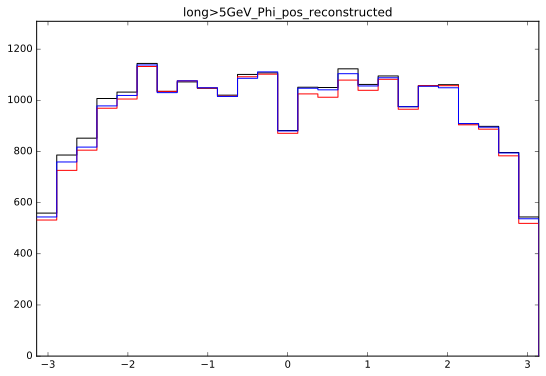

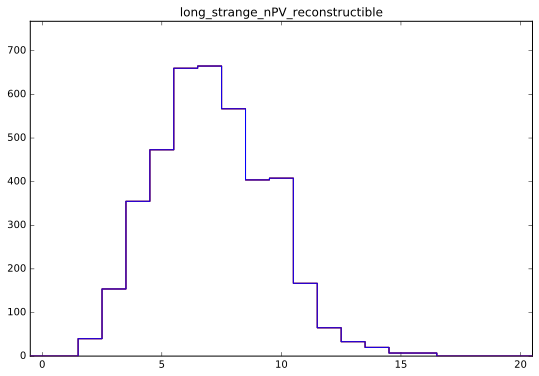

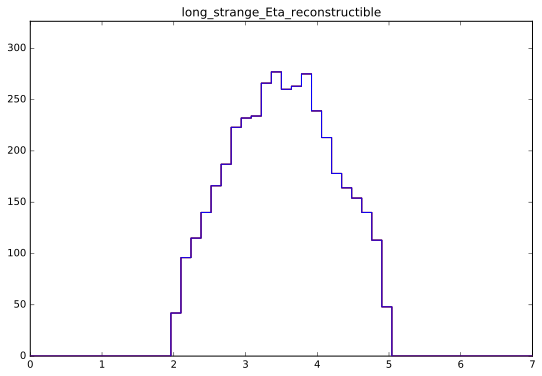

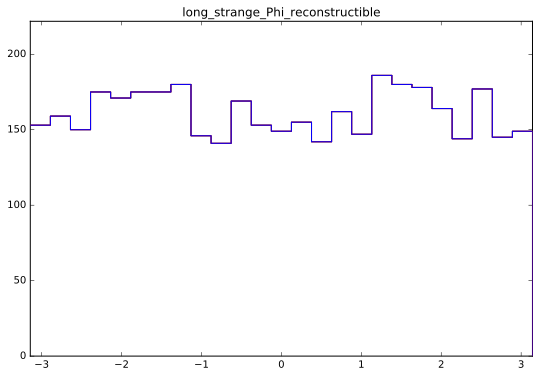

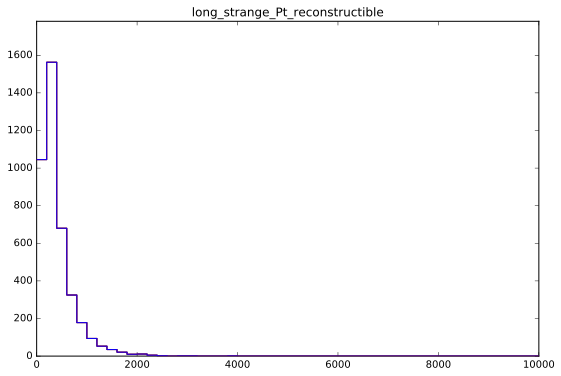

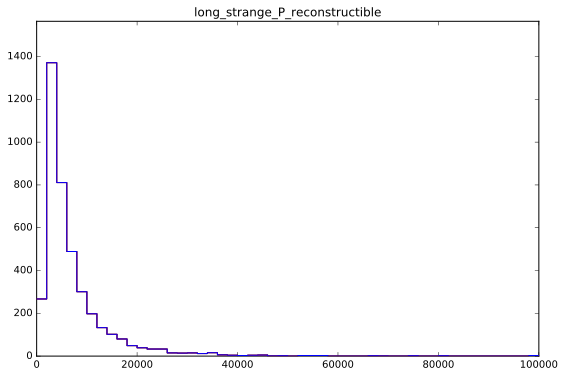

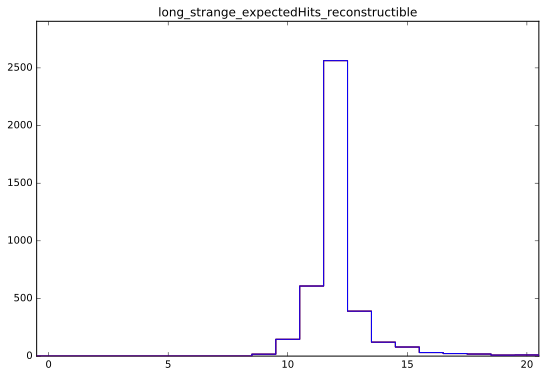

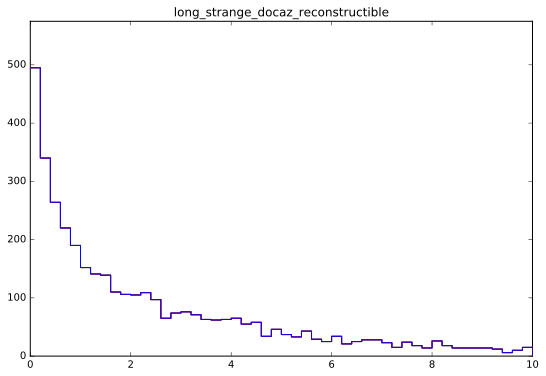

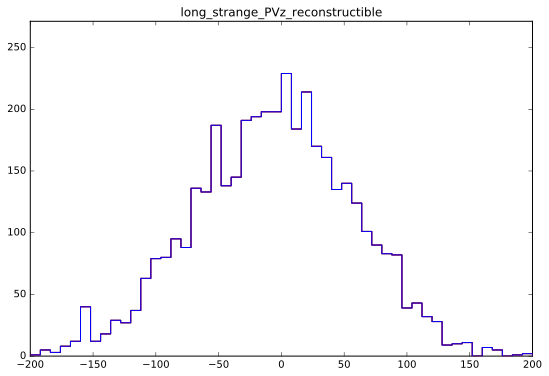

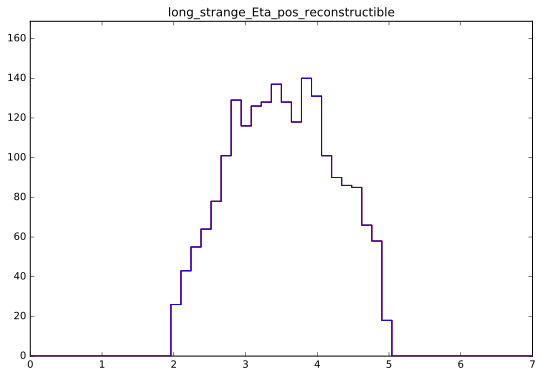

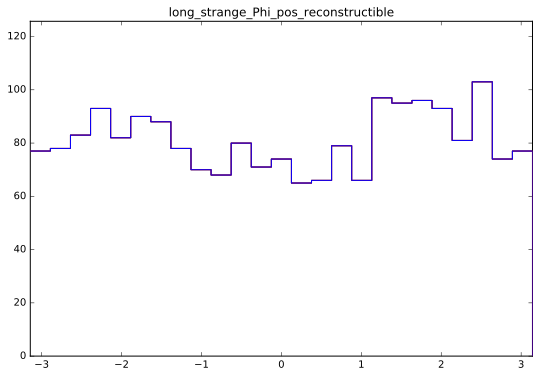

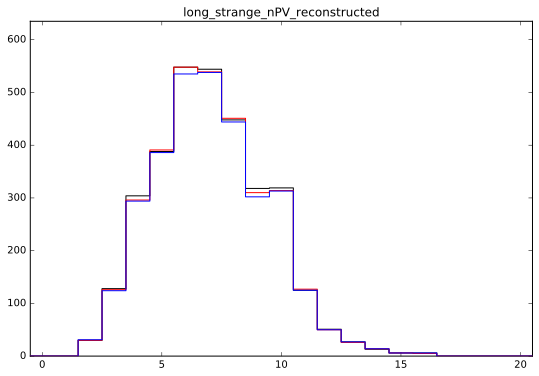

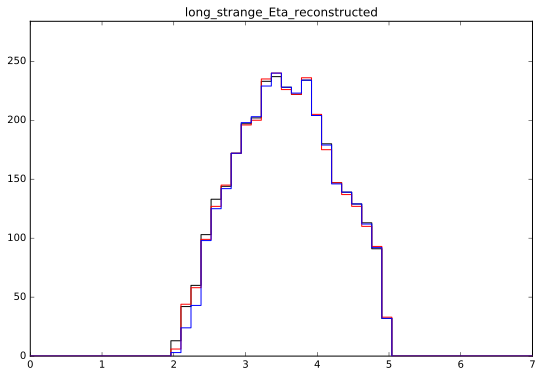

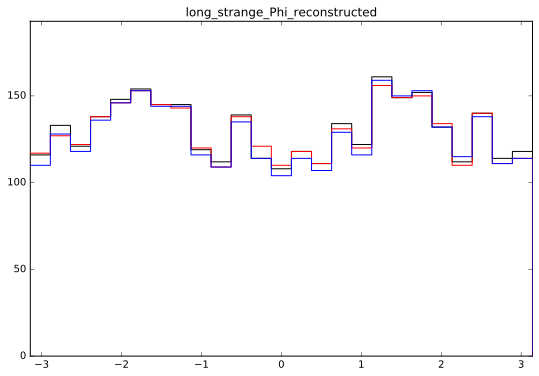

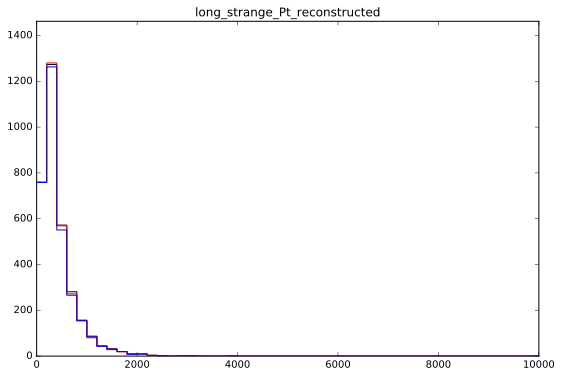

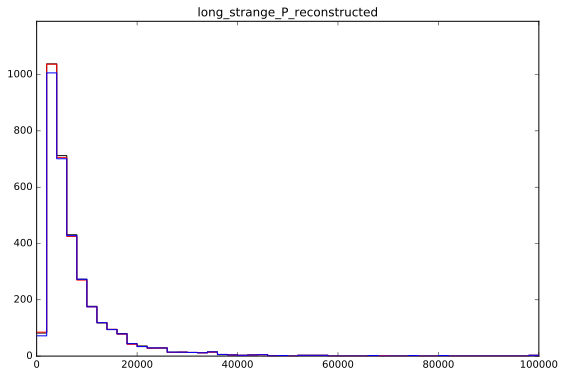

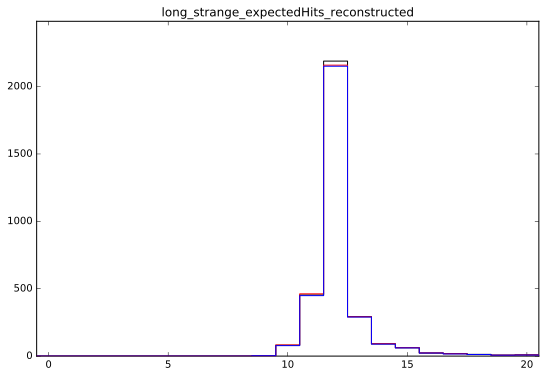

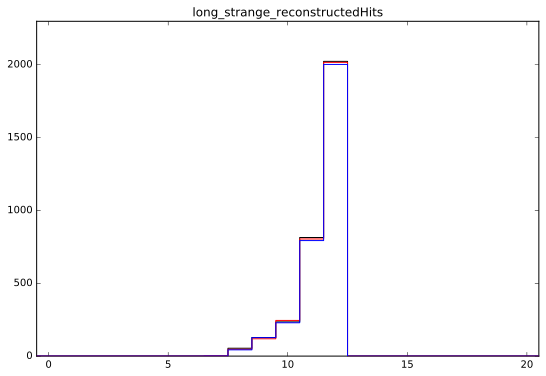

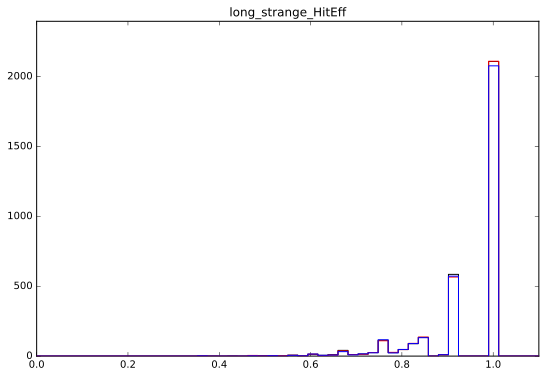

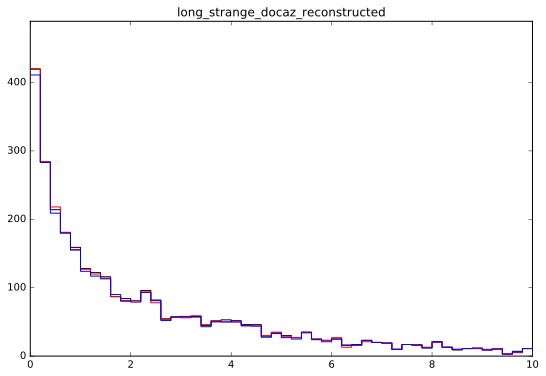

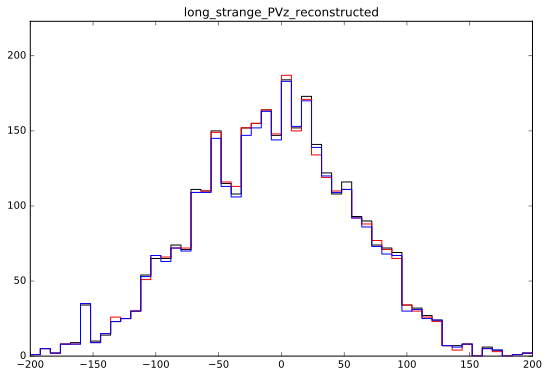

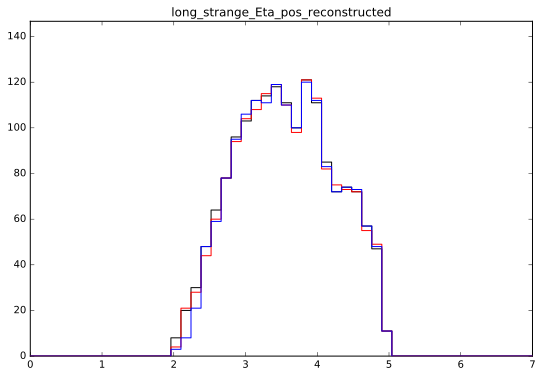

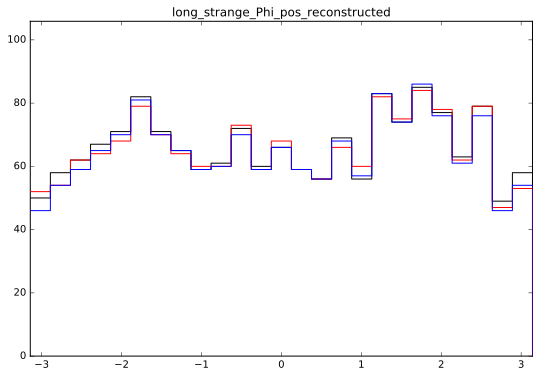

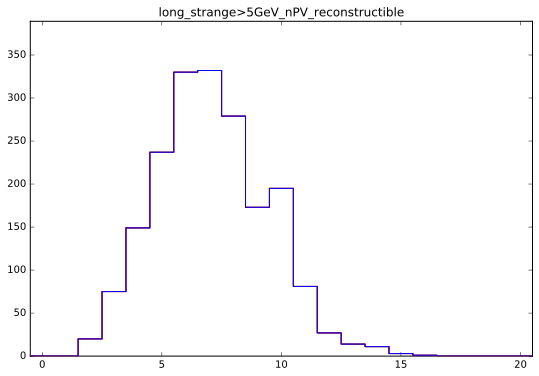

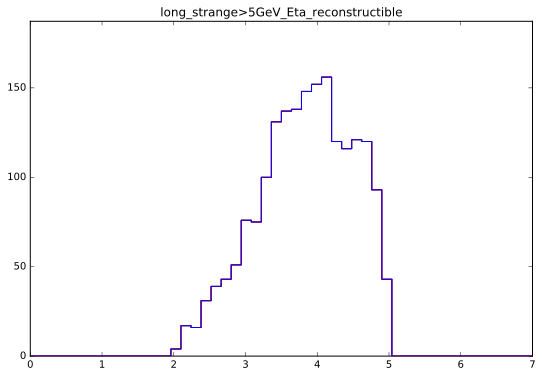

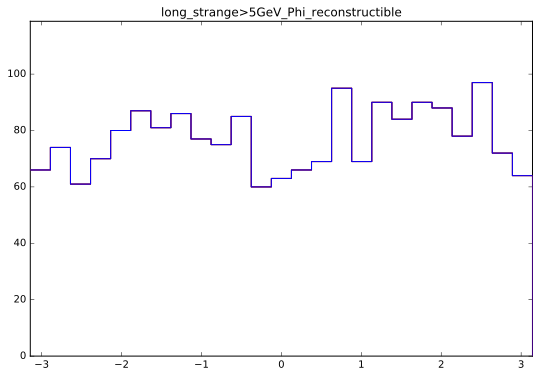

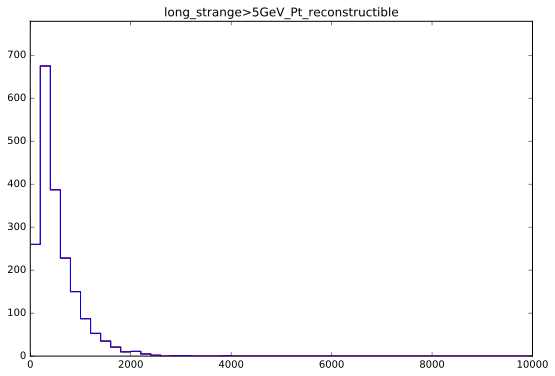

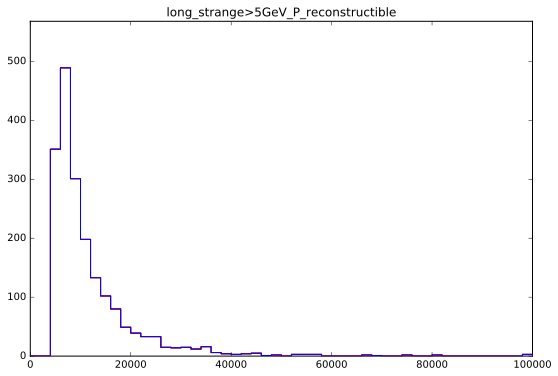

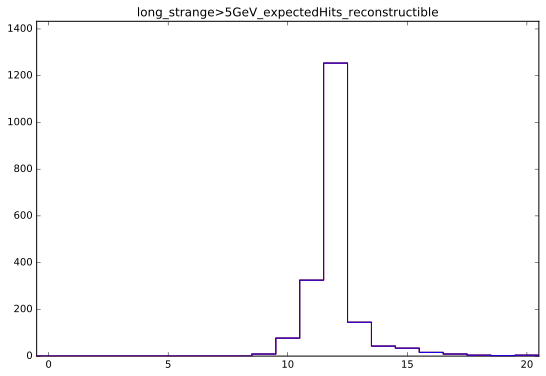

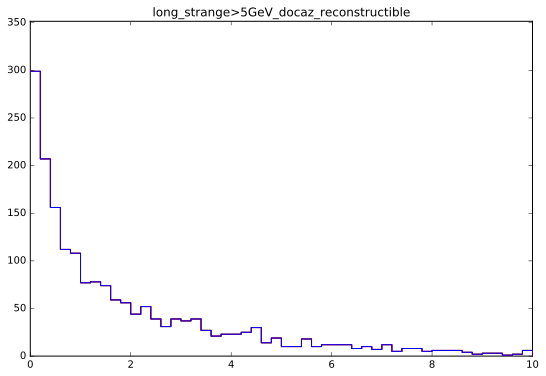

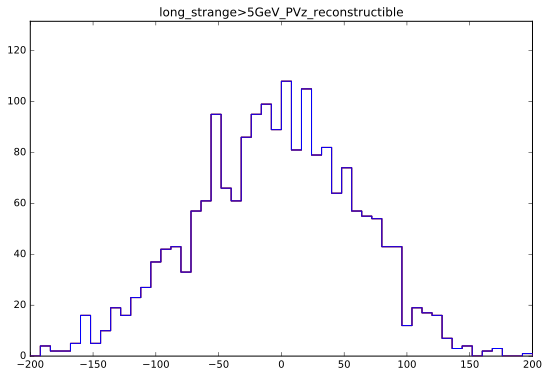

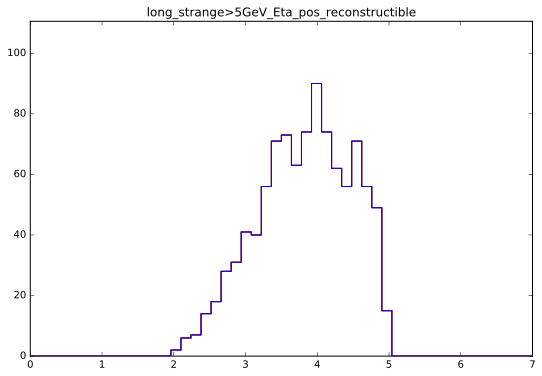

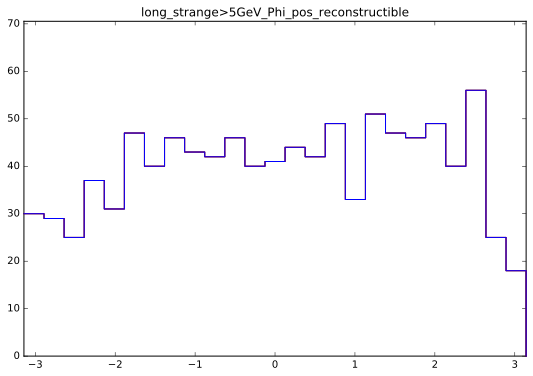

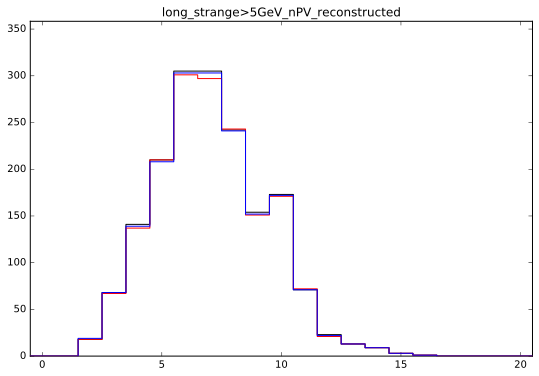

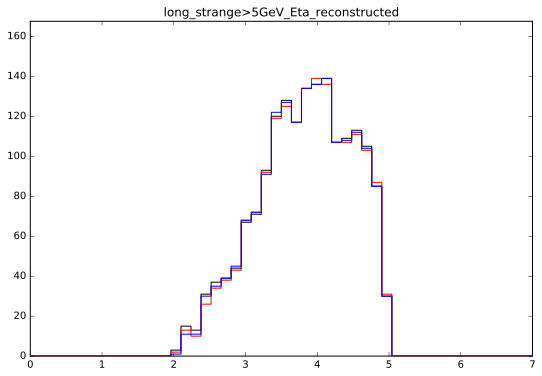

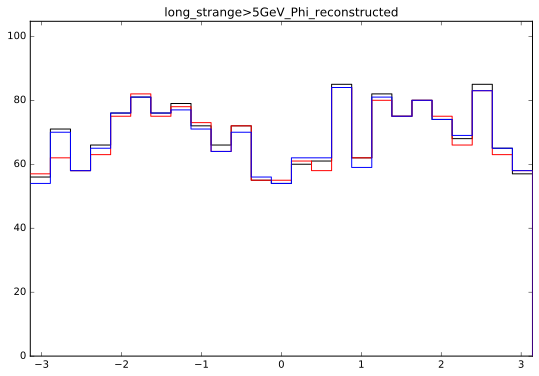

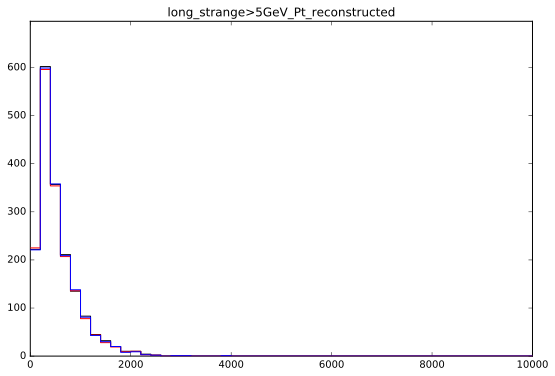

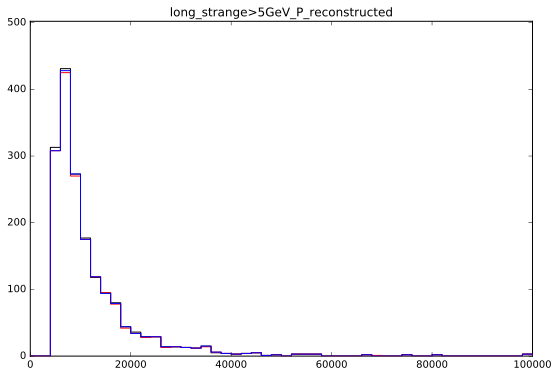

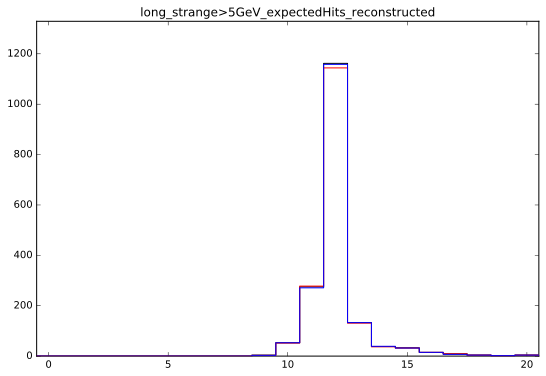

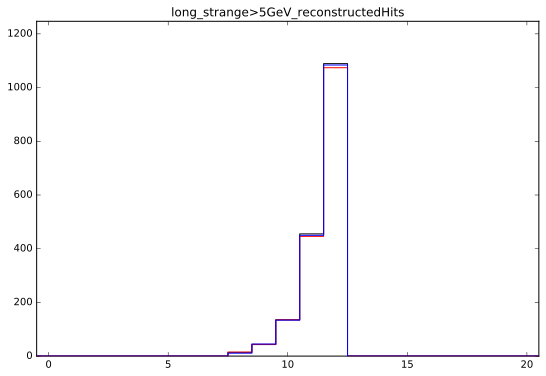

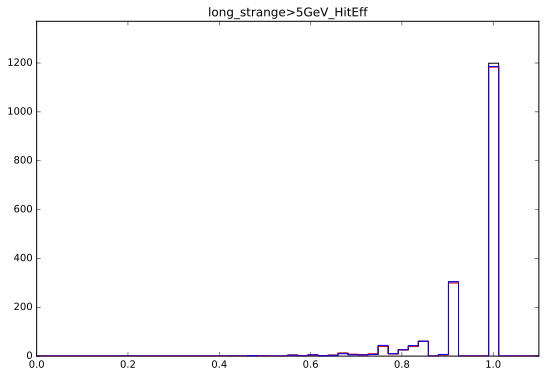

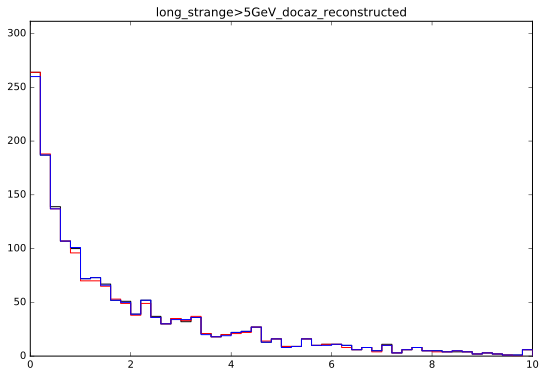

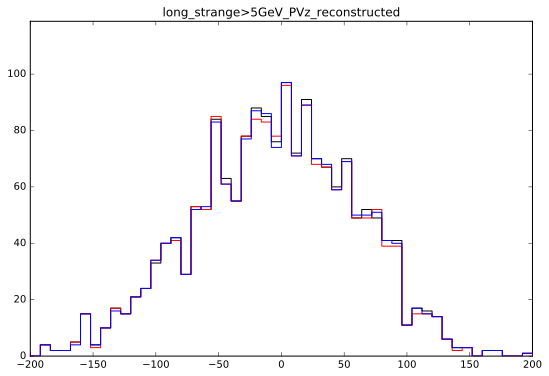

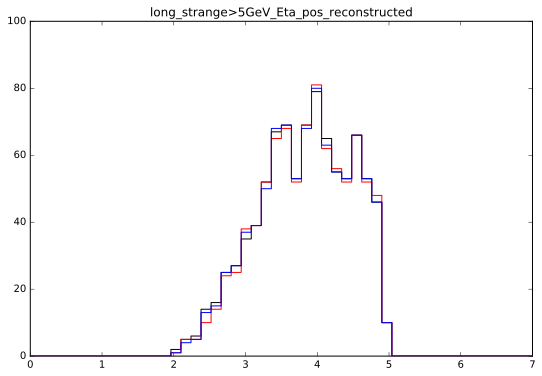

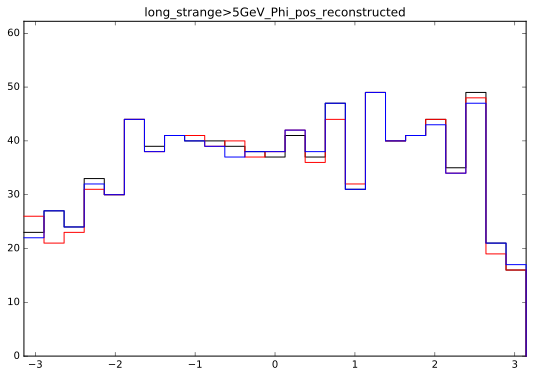

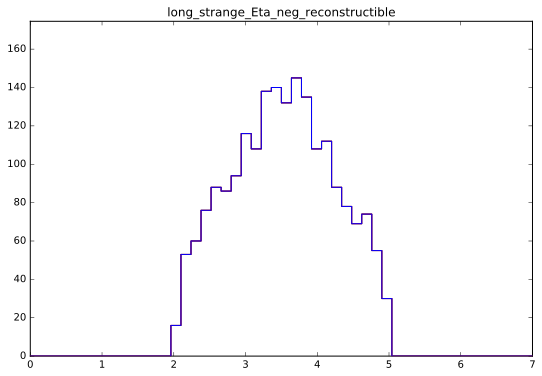

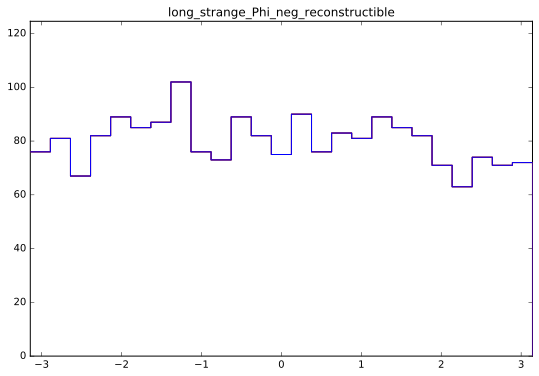

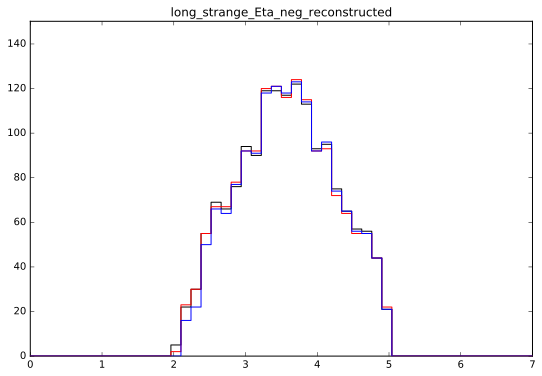

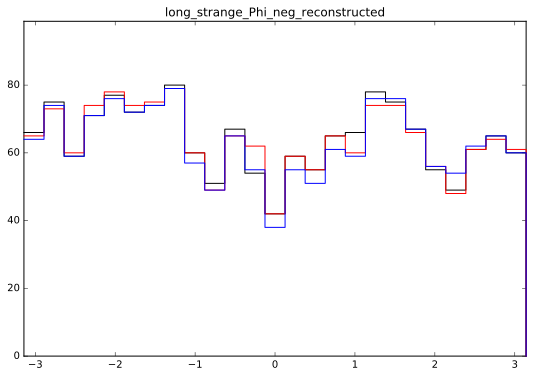

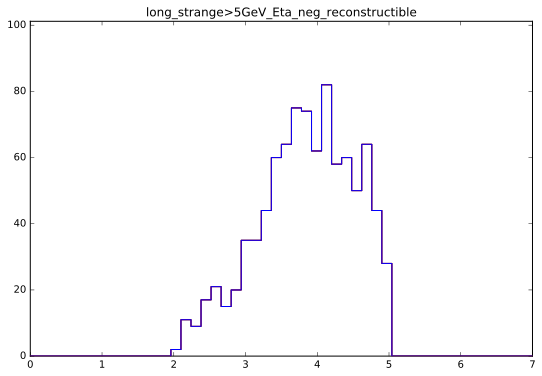

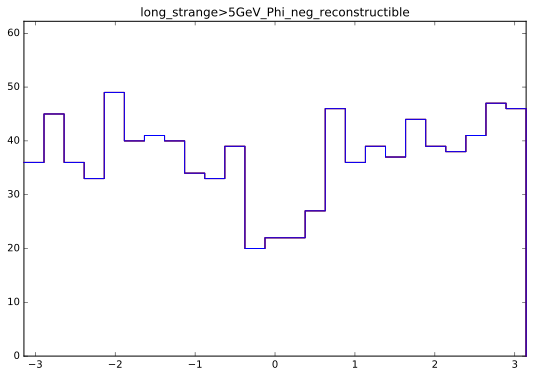

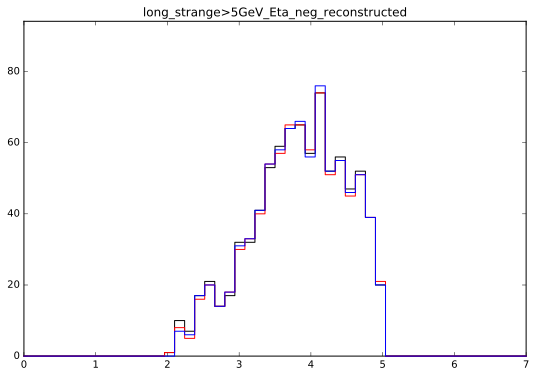

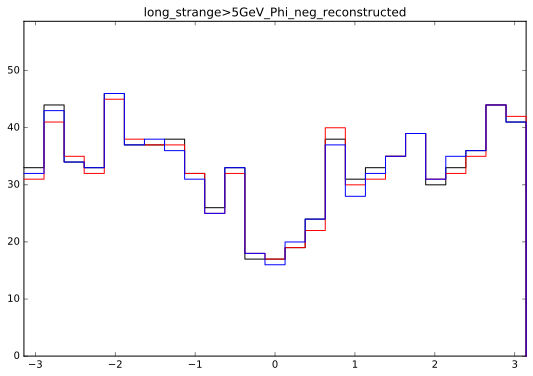

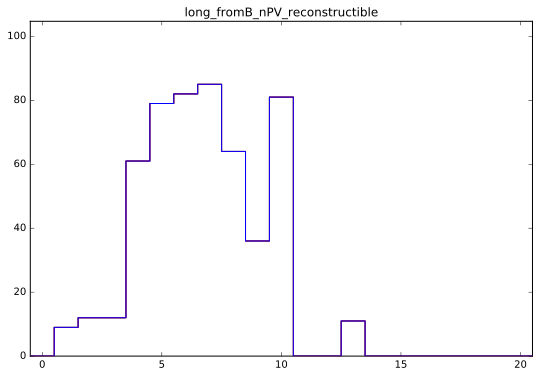

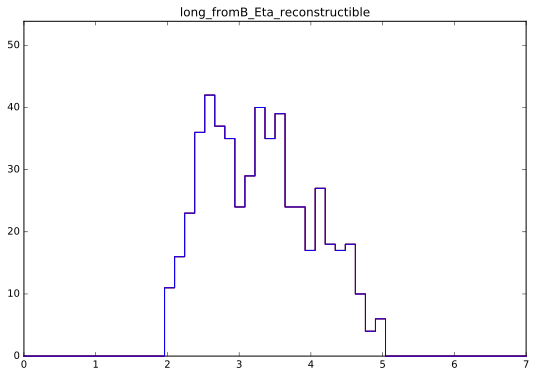

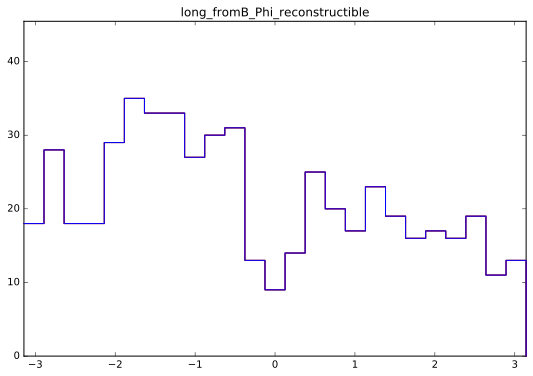

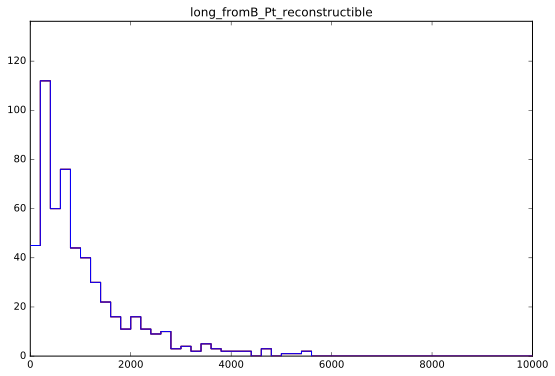

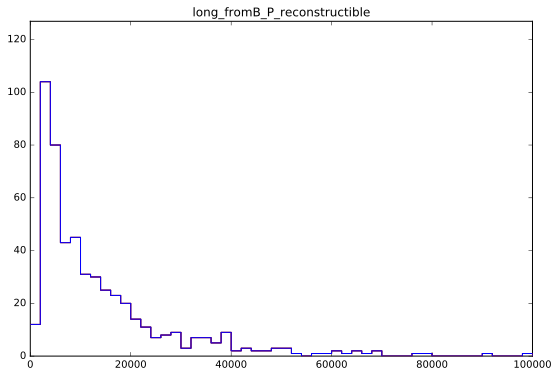

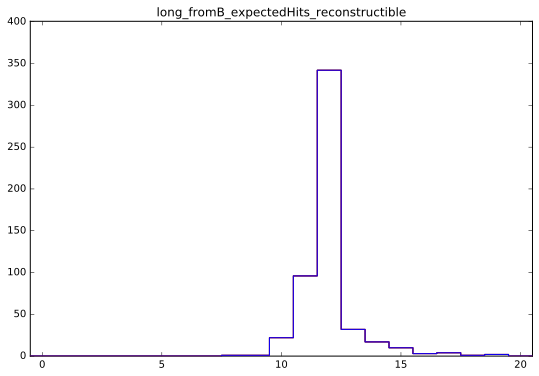

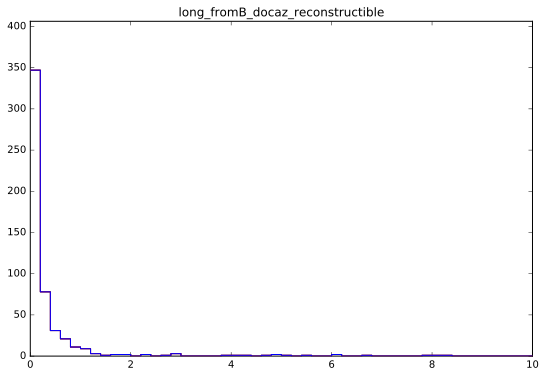

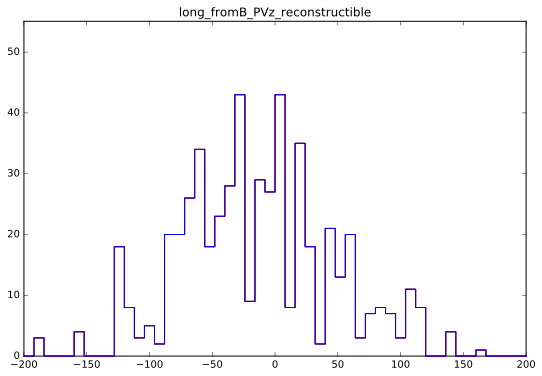

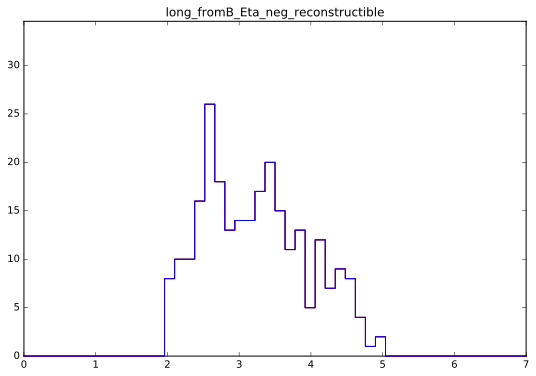

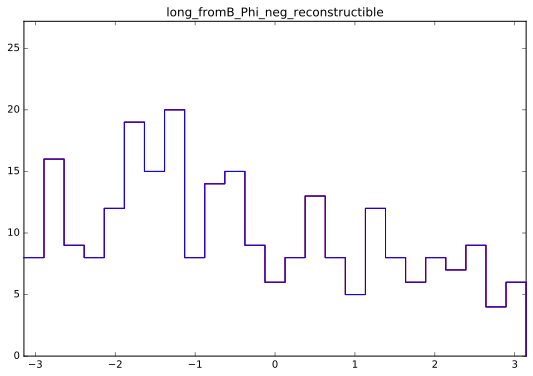

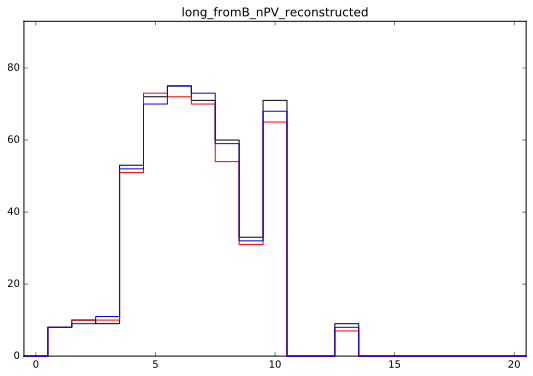

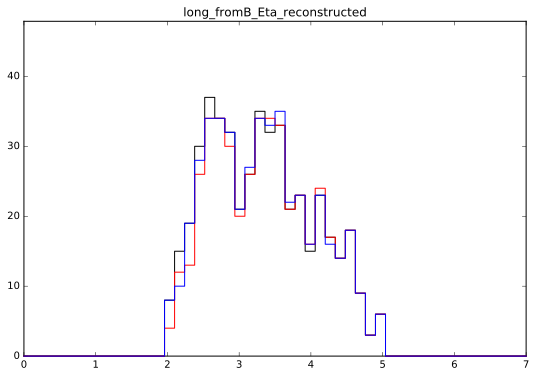

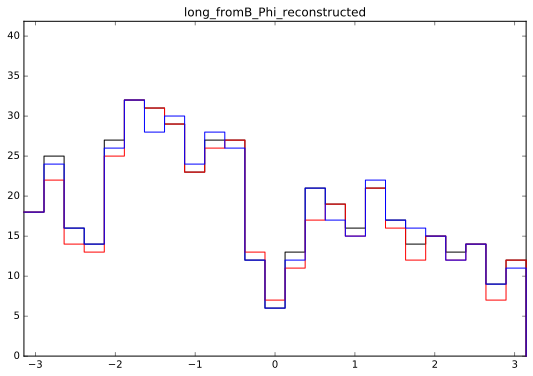

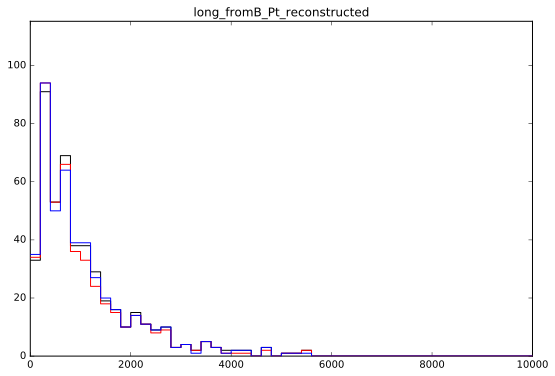

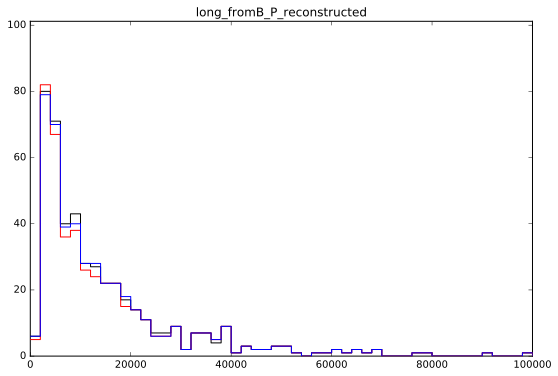

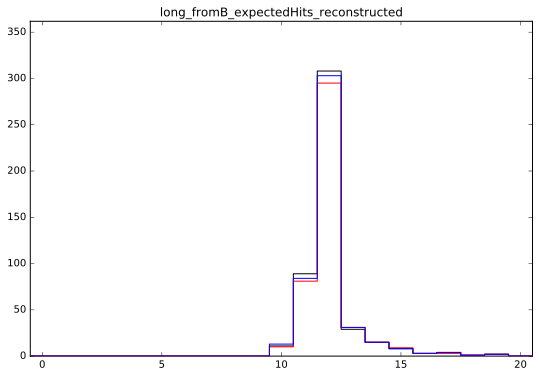

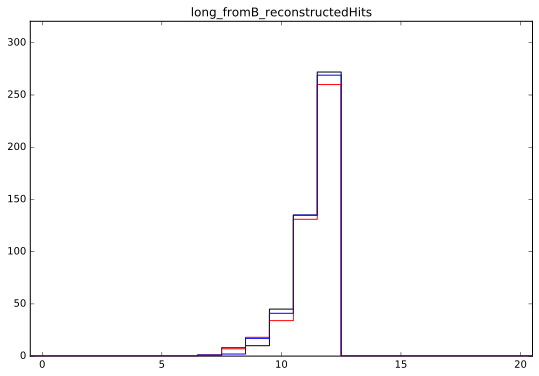

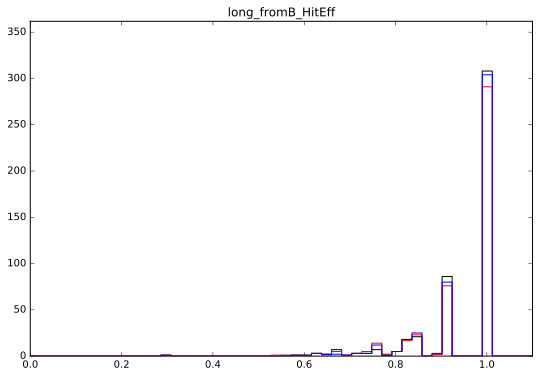

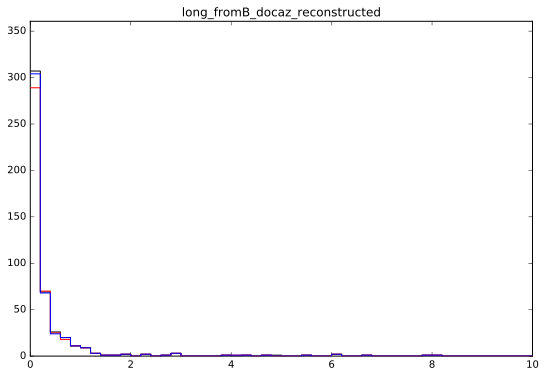

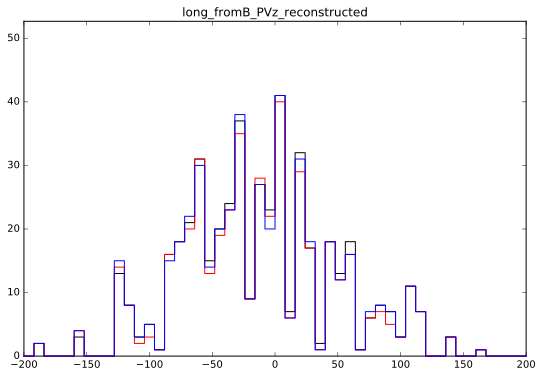

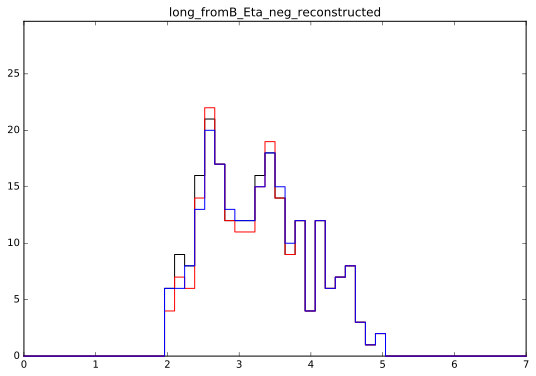

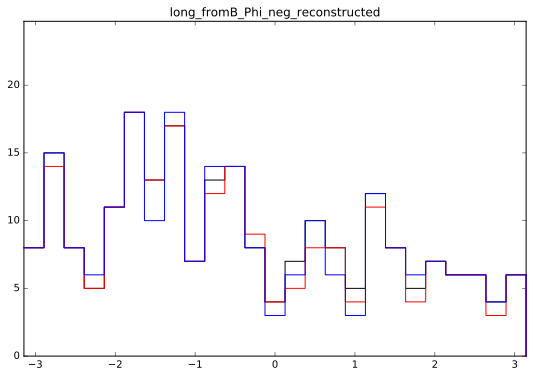

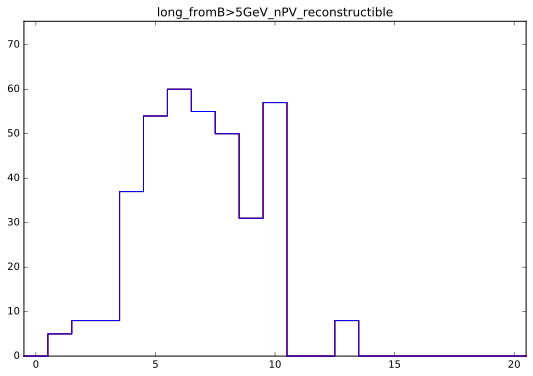

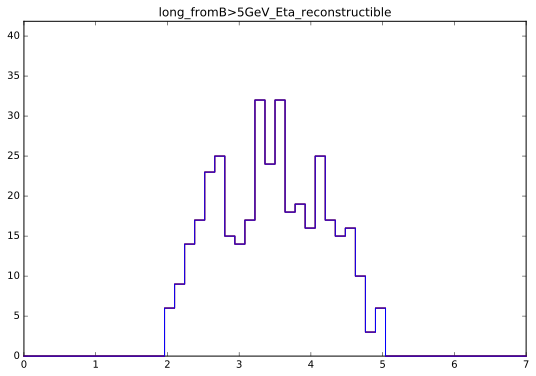

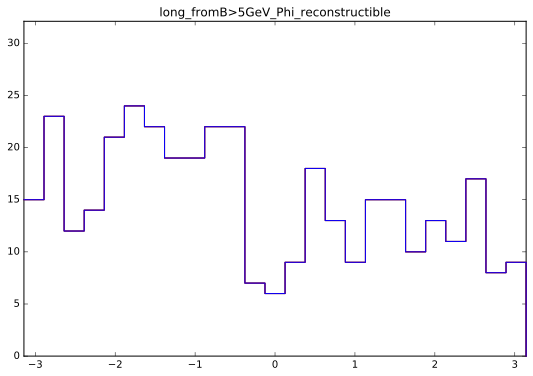

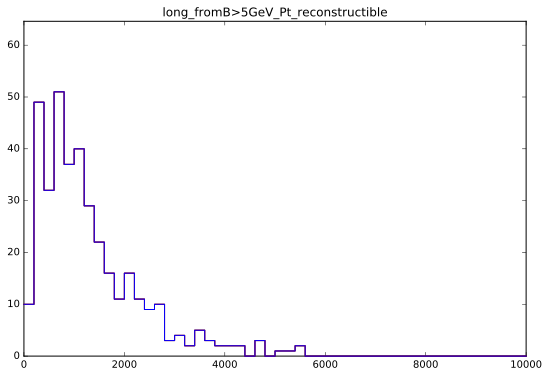

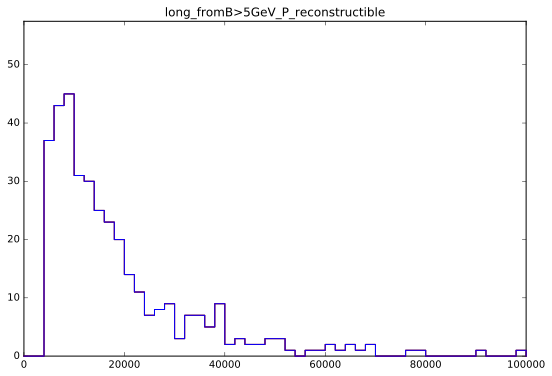

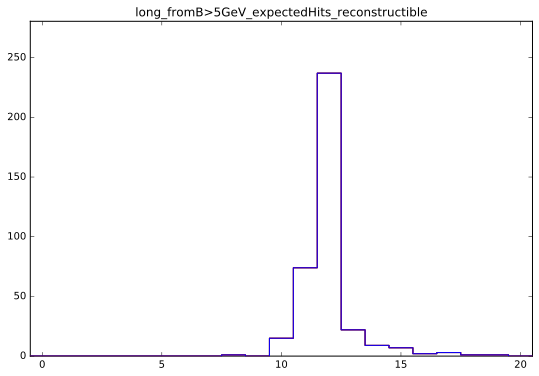

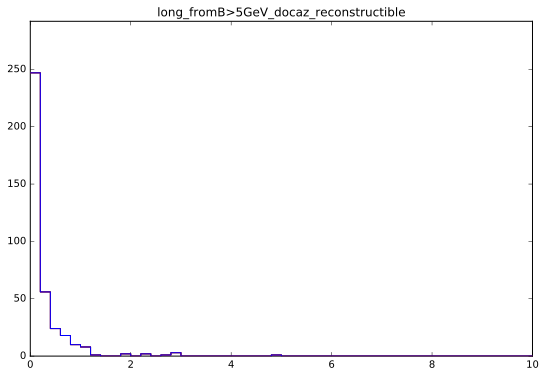

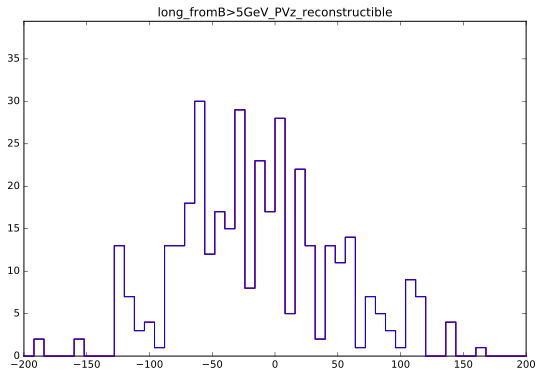

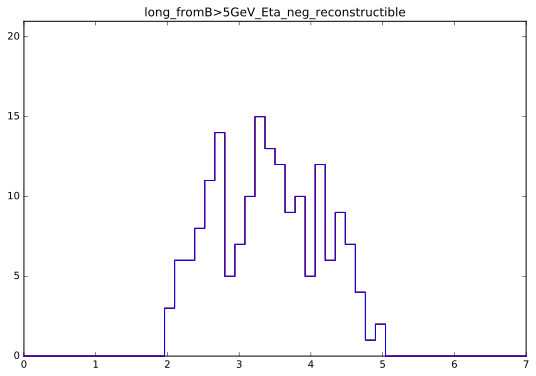

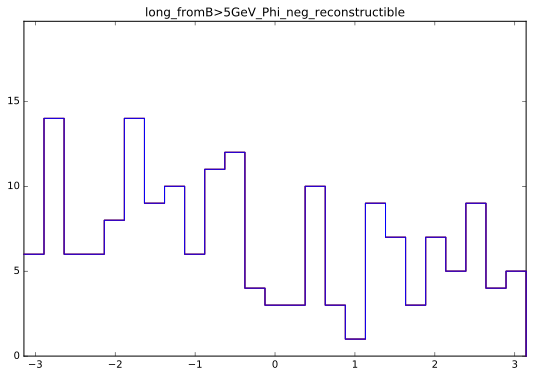

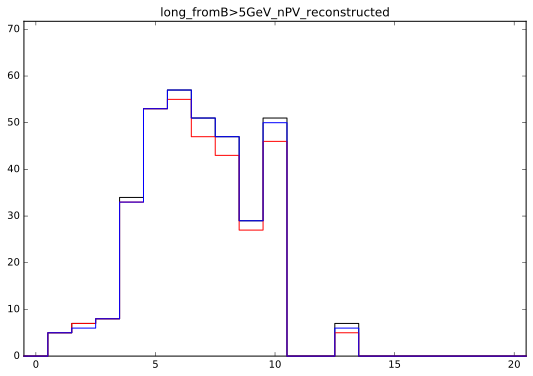

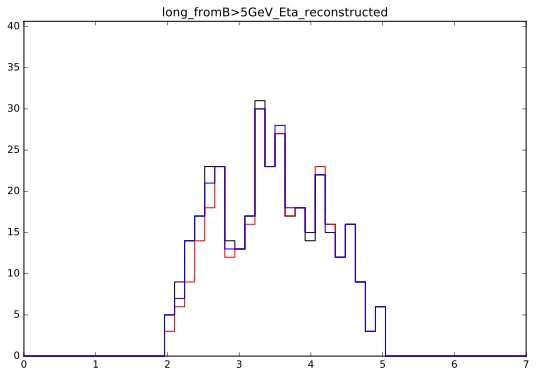

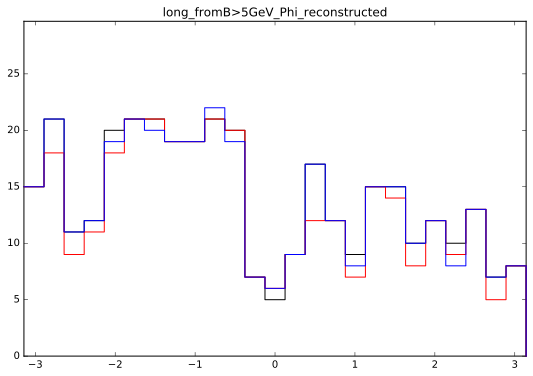

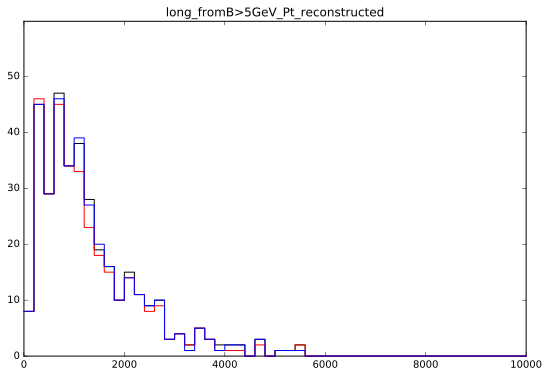

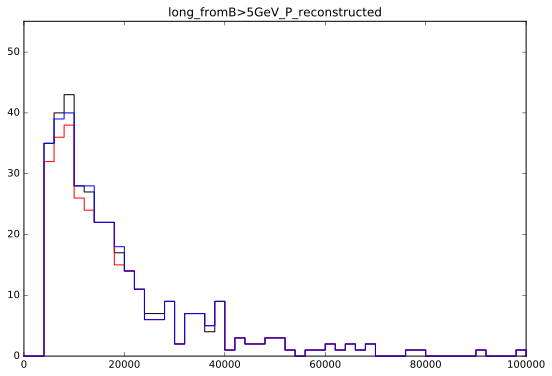

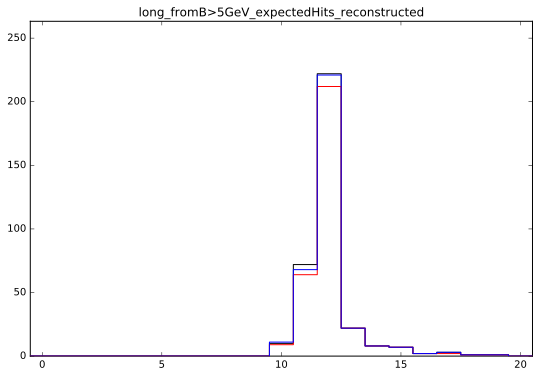

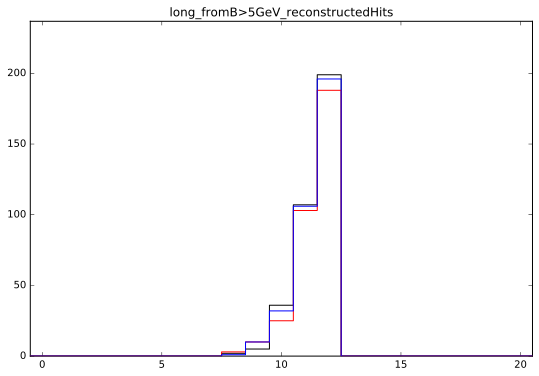

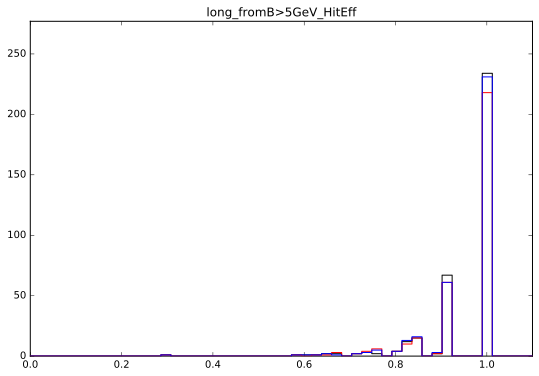

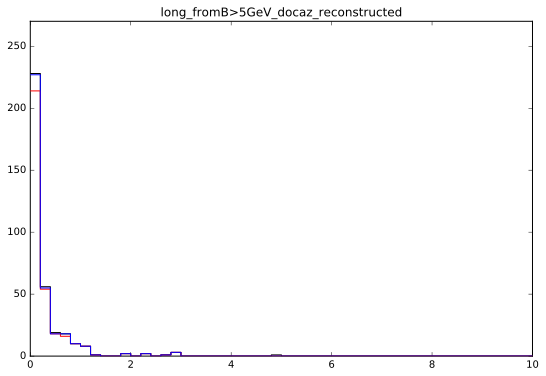

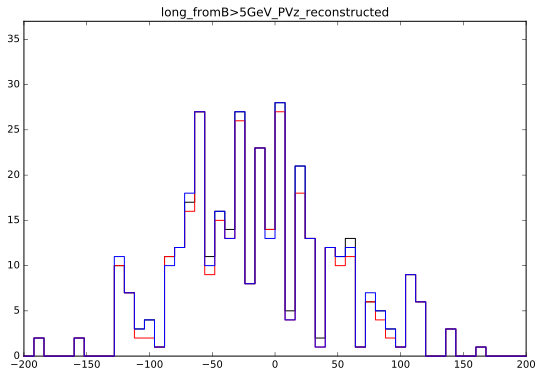

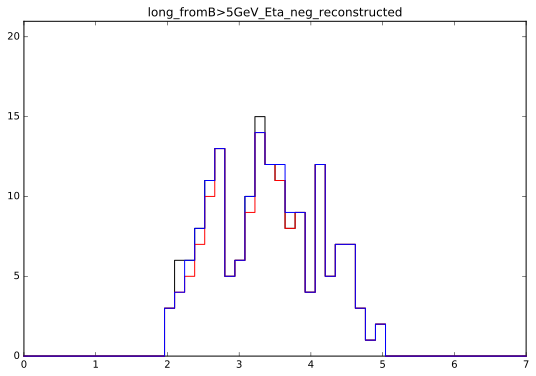

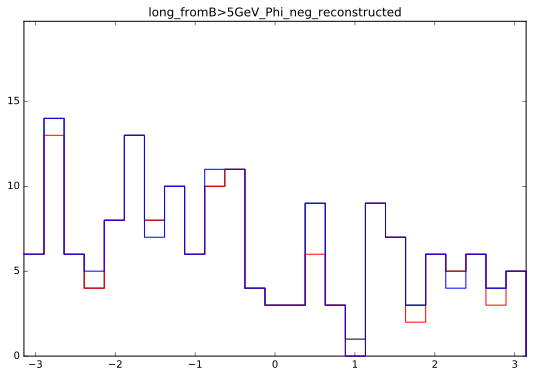

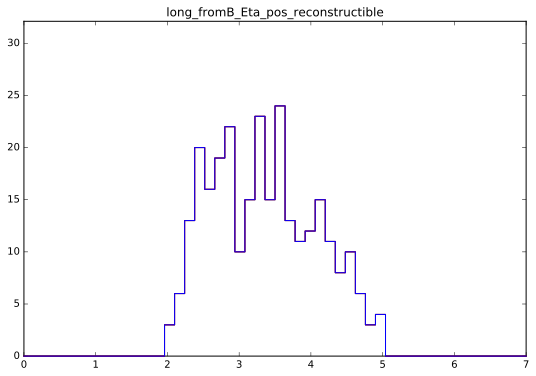

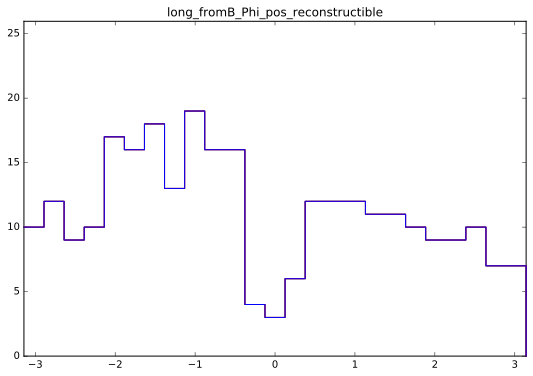

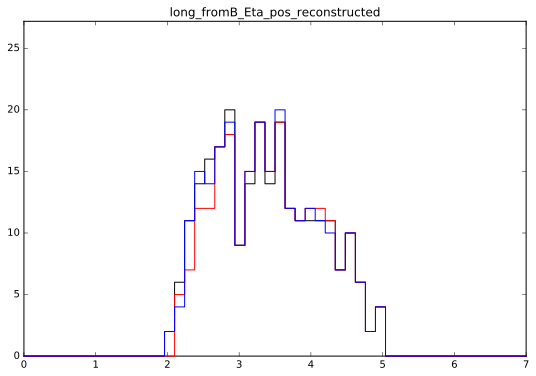

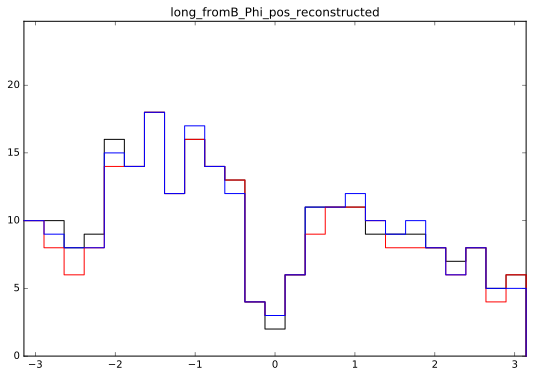

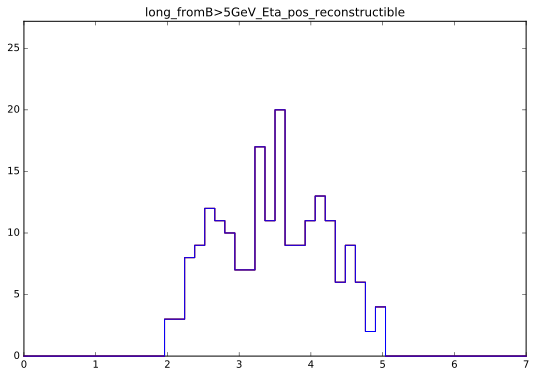

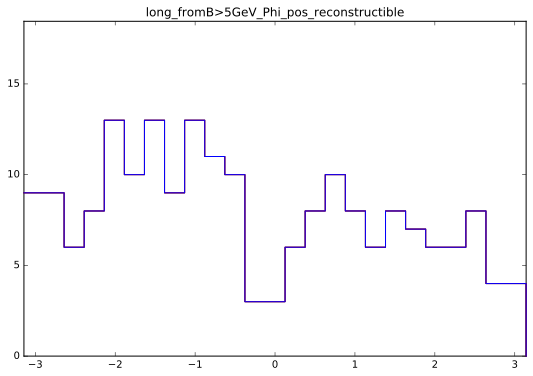

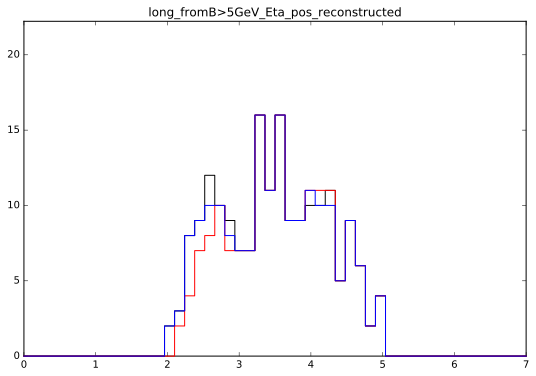

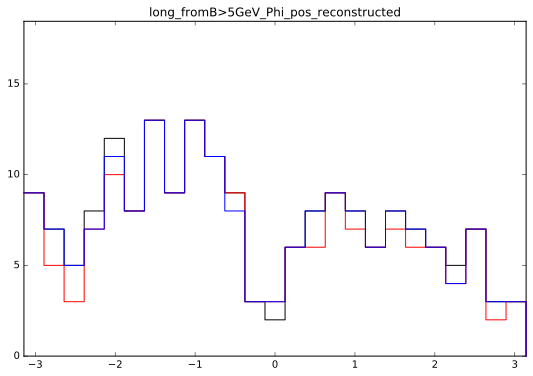

In [10]:
for key in keys:
    if isinstance(getattr(original.Track.PrChecker.Forward, key), rootpy.plotting.hist._Hist2D):
        print('Skipped:', key)
    else:
        plt.figure()
        plot(key)